In [2]:
import os
from modules.analyze_session_stats import analyze_session_stats
import pandas as pd
import matplotlib.pyplot as plt
# 1) List your CSVs and titles
DATASETS = [
    'Resampled/BTCUSD_30m.csv',
    'Resampled/BTCUSD_1h.csv',
    'Resampled/BTCUSD_1d.csv',
]
TITLES = [
    '30-Minute',
    '1-Hour',
    '1-Day',
]

# 2) Where to put the session stats
OUTPUT_FOLDER = 'AnalysisResults'

# ensure the output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# run the analysis for each timeframe
for csv_path, title in zip(DATASETS, TITLES):
    analyze_session_stats(csv_path, title, OUTPUT_FOLDER)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 30-Minute ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   232.659434  8275.86  254.526839  1840.324286   
Asia + London Overlap  216.729907  2418.55  224.594006  1576.157857   
London                 237.794038  6587.35  220.578151  1917.249286   
London + NY Overlap    334.919418  5764.05  250.061313  2187.215000   
New York               300.402494  5306.71  296.749285  3014.570714   
Other                  263.320979  7083.76  291.696949  2285.768571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.186088  199.577402  112.139546  165.092108   
Asia + London Overlap     0.63

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(



=== Session Stats: 1-Hour ===
                            range               ATR_14               \
                             mean      max        mean          max   
session                                                               
Asia                   334.240223  8275.86  394.689749  3550.540000   
Asia + London Overlap  313.647185  3235.56  354.631348  2163.305714   
London                 341.435623  7442.23  340.669253  2291.030000   
London + NY Overlap    486.927490  7394.21  347.338429  2529.571429   
New York               430.333580  6783.34  373.687706  3151.238571   
Other                  376.829785  7083.76  401.971920  3434.988571   

                      price_return              abs_return              \
                              mean         std        mean         std   
session                                                                  
Asia                     -0.510991  279.105455  157.217392  230.609787   
Asia + London Overlap     1.21433

C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\analyze_session_stats.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


→ saved plot: AnalysisResults\candle range_dist_1-Day.png
→ saved plot: AnalysisResults\candle return_dist_1-Day.png
→ saved plot: AnalysisResults\atr_14_dist_1-Day.png
→ saved plot: AnalysisResults\range efficiency_dist_1-Day.png


In [3]:
%load_ext autoreload
%autoreload 2


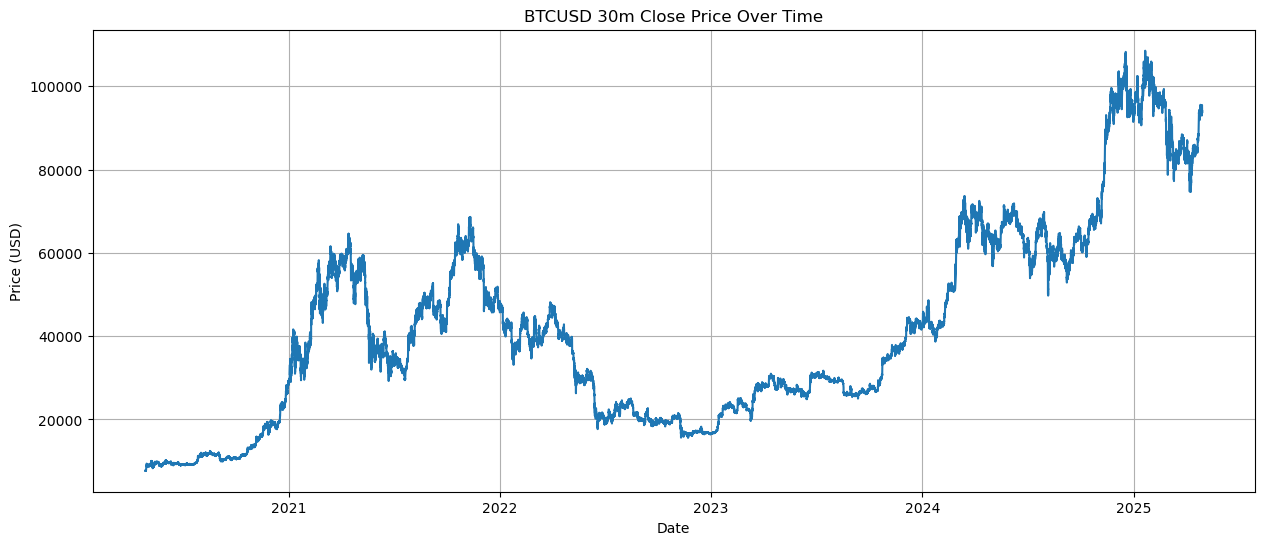

In [4]:
# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# Line chart
plt.figure(figsize=(15,6))
plt.plot(df.index, df['close'])
plt.title('BTCUSD 30m Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


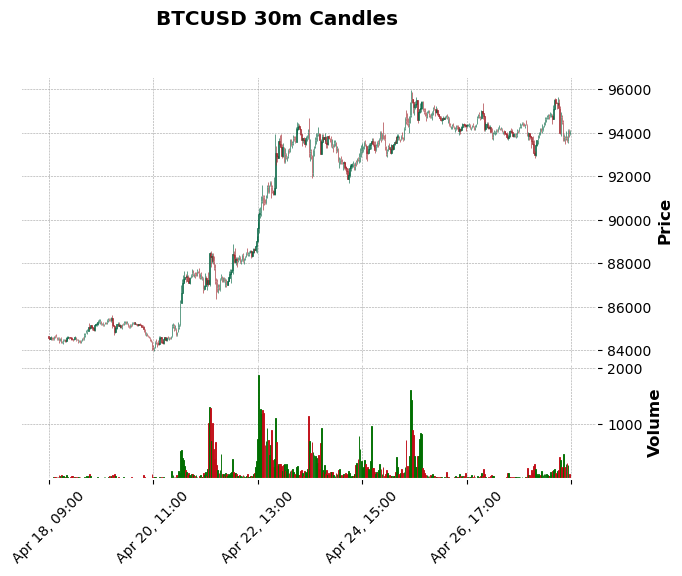

In [5]:
import mplfinance as mpf

# Load your dataset
df = pd.read_csv('./Resampled/BTCUSD_30m.csv', index_col=0, parse_dates=True)

# For mplfinance, dataframe must have columns: Open, High, Low, Close (capitalized)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot candlestick chart
mpf.plot(df[-500:], type='candle', style='charles', title='BTCUSD 30m Candles', volume=True)


C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
C:\Users\Sarthak\Documents\ML\crypto-session-analysis\Crypto-analysis\modules\timeframe_processor.py:18: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict


=== Combined Session Movement and Volatility Stats ===
                 session   range_mean  range_max  ATR_14_mean   ATR_14_max  \
0                   Asia   232.659434    8275.86   254.526839  1840.324286   
1  Asia + London Overlap   216.729907    2418.55   224.594006  1576.157857   
2                 London   237.794038    6587.35   220.578151  1917.249286   
3    London + NY Overlap   334.919418    5764.05   250.061313  2187.215000   
4               New York   300.402494    5306.71   296.749285  3014.570714   
5                  Other   263.320979    7083.76   291.696949  2285.768571   
0                   Asia   334.240223    8275.86   394.689749  3550.540000   
1  Asia + London Overlap   313.647185    3235.56   354.631348  2163.305714   
2                 London   341.435623    7442.23   340.669253  2291.030000   
3    London + NY Overlap   486.927490    7394.21   347.338429  2529.571429   
4               New York   430.333580    6783.34   373.687706  3151.238571   
5       

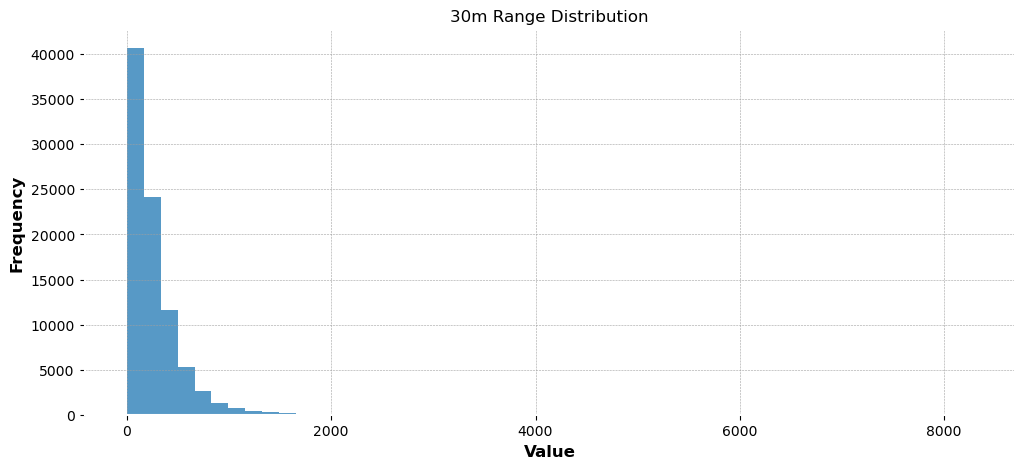

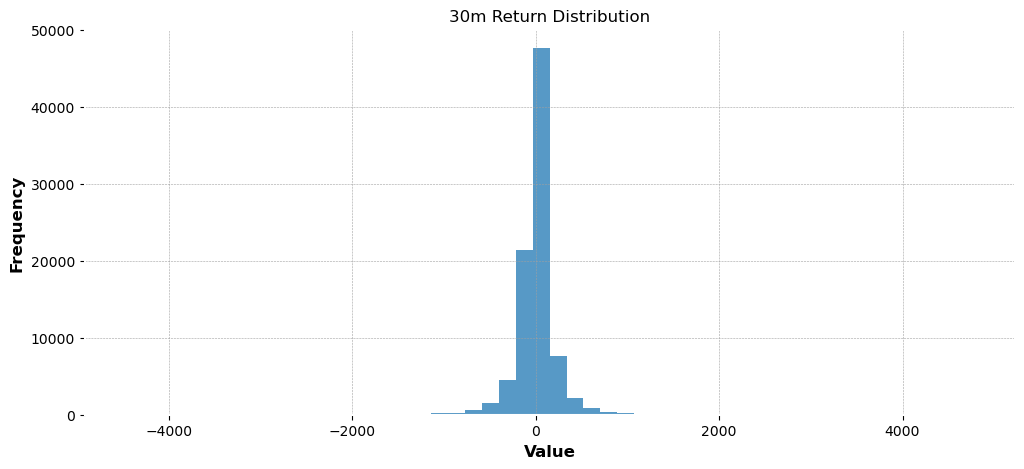

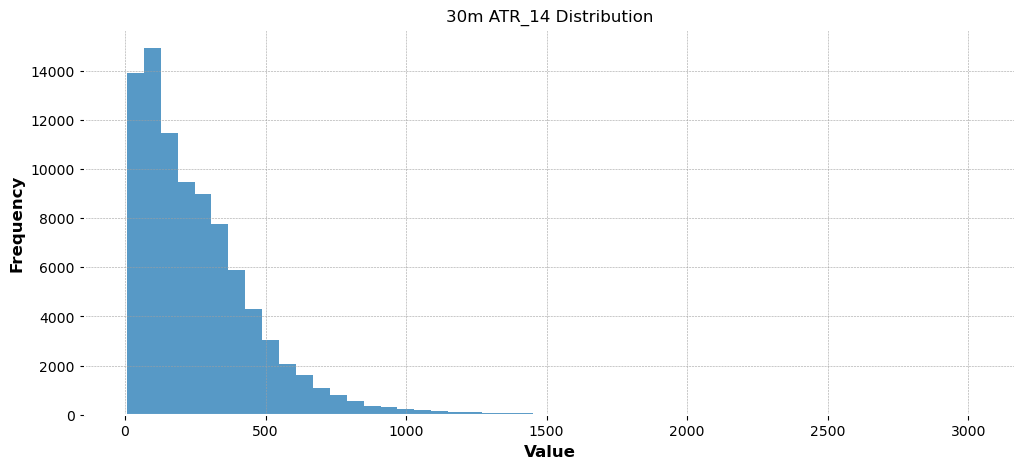

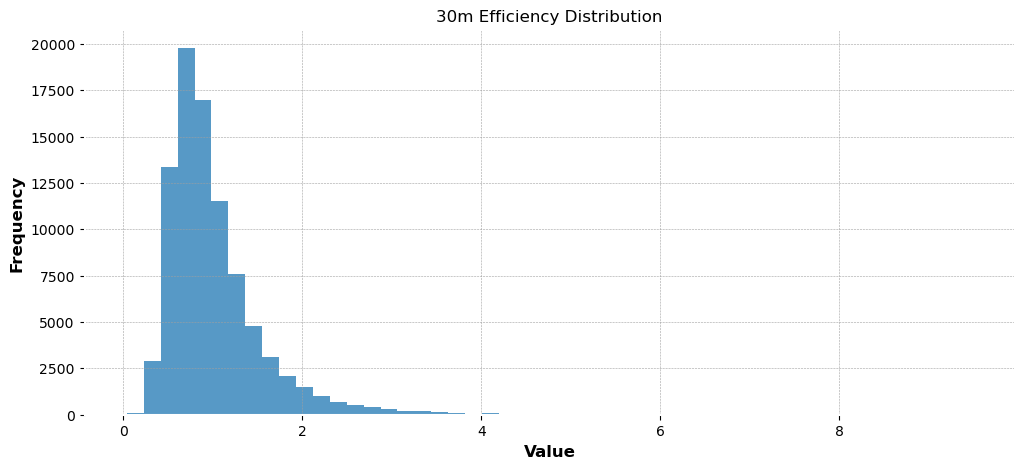

In [6]:
# main_runner.ipynb
import sys
sys.path.append('./')

# --- Setup Imports ---
import pandas as pd
from modules.timeframe_processor import process_timeframe
from visualization.plot_distributions import plot_distribution

# --- Process Each Timeframe ---
# Process all timeframes
df_30m, stats_30m = process_timeframe('./Resampled/BTCUSD_30m.csv', '30m')
df_1h, stats_1h = process_timeframe('./Resampled/BTCUSD_1h.csv', '1h')
df_1d, stats_1d = process_timeframe('./Resampled/BTCUSD_1d.csv', '1d')

# Combine all stats
all_stats = pd.concat([stats_30m, stats_1h, stats_1d])
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')


# --- View Results ---
print("\n=== Combined Session Movement and Volatility Stats ===")
print(all_stats)

# --- Save Results ---
all_stats.to_csv('./AnalysisResults/session_metrics_all_timeframes.csv')
print("✅ Combined session stats saved to ./AnalysisResults/session_metrics_all_timeframes.csv")

# --- Plot Distributions (Optional) ---
# You can now plot for any df easily!
plot_distribution(df_30m['range'], '30m Range Distribution')
plot_distribution(df_30m['price_return'], '30m Return Distribution')
plot_distribution(df_30m['ATR_14'], '30m ATR_14 Distribution')
plot_distribution(df_30m['efficiency'], '30m Efficiency Distribution')

# Same thing can be done for 1h, 1d if needed


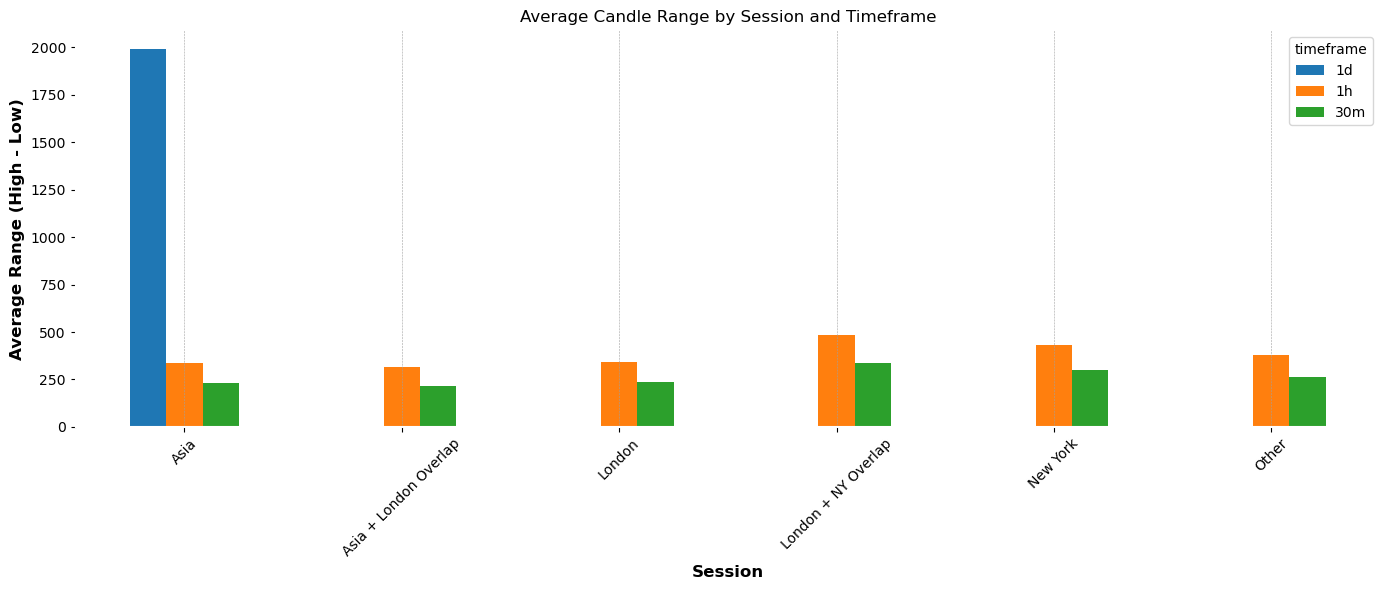

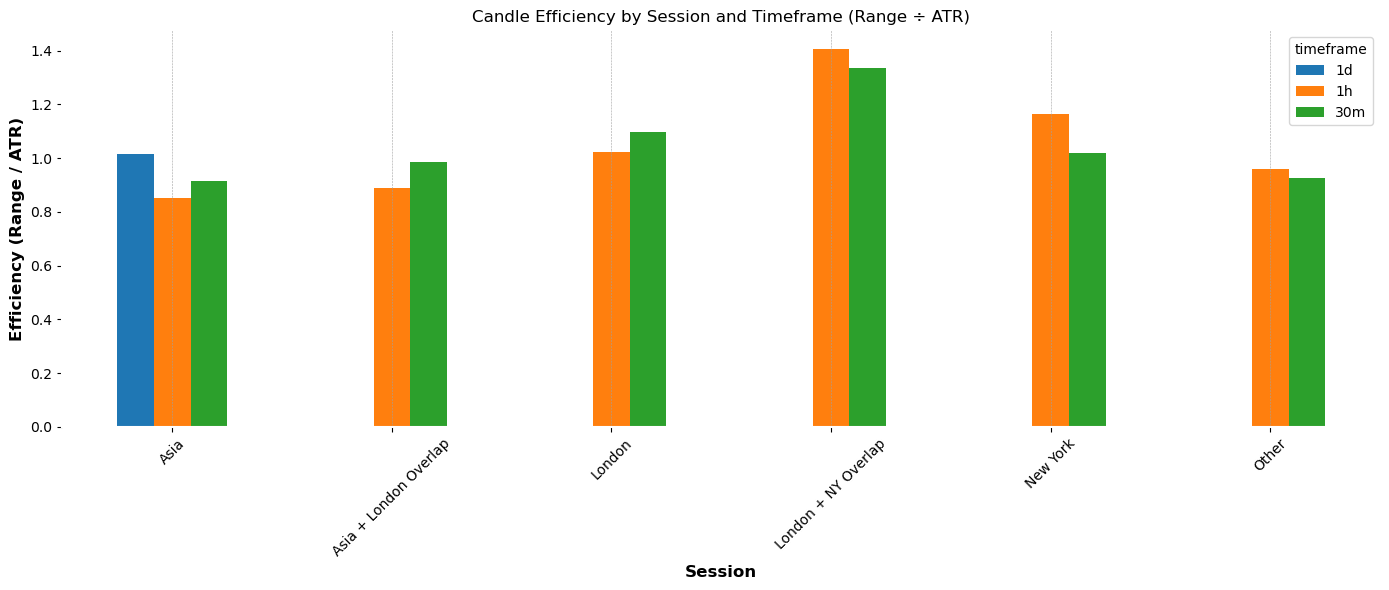

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct session metrics file
df = pd.read_csv('./AnalysisResults/session_metrics_all_timeframes.csv')  # ✅ Correct path

# Reset index and clean
df = df.reset_index(drop=True)
df = df.dropna(subset=['range_mean', 'efficiency_mean', 'timeframe', 'session'])

# --- Plot 1: Average Range ---
pivot_range = df.pivot(index='session', columns='timeframe', values='range_mean')
pivot_range.plot(kind='bar', figsize=(14, 6), title='Average Candle Range by Session and Timeframe')
plt.ylabel('Average Range (High - Low)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot 2: Range Efficiency ---
pivot_eff = df.pivot(index='session', columns='timeframe', values='efficiency_mean')
pivot_eff.plot(kind='bar', figsize=(14, 6), title='Candle Efficiency by Session and Timeframe (Range ÷ ATR)')
plt.ylabel('Efficiency (Range / ATR)')
plt.xlabel('Session')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [8]:
from modules.session_aggregator import build_session_ohlc

# make sure all your price columns are lowercase
df_30m.columns = [col.lower() for col in df_30m.columns]

# --- Build session-level candles from 30m data ---
session_df = build_session_ohlc(df_30m)          # no 'timeframe' arg here
# if you want to tag the timeframe in the output:
session_df['timeframe'] = '30m'

session_df.to_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    index=False
)
print("✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv")


✅ Session-level candles saved to ./AnalysisResults/session_candles_from_30m.csv


In [9]:
print(df_30m.columns.tolist())


['open', 'high', 'low', 'close', 'volume', 'session', 'range', 'price_return', 'abs_return', 'atr_14', 'efficiency']


In [10]:
import pandas as pd
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session‐level candles ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv'
)

# --- Standardize column names to lowercase ---
session_df.rename(columns=str.lower, inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics for session bars ---
# This will add:
#   - 'price_return'
#   - 'abs_return'
#   - 'ATR_14'
#   - 'efficiency'
session_df = calculate_movement_metrics(
    session_df,
    atr_window=14
)

# --- (Optional) alias price_return back to 'return' if you need it ---
session_df['return'] = session_df['price_return']

# --- Final cleaning of infinities & NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Group by session and compute summary stats ---
session_stats = session_df.groupby('session').agg({
    'range':        ['mean','max'],
    'ATR_14':       ['mean','max'],
    'price_return': ['mean','std'],
    'abs_return':   ['mean','std'],
    'efficiency':   'mean'
})

# Flatten the MultiIndex and round to 2 decimal places
session_stats.columns = ['_'.join(col) for col in session_stats.columns]
session_stats = session_stats.round(2)

# --- Print and save results ---
print("=== Corrected Session‐Level Daily Stats ===")
print(session_stats)

session_stats.to_csv(
    './AnalysisResults/session_level_daily_stats.csv'
)


=== Corrected Session‐Level Daily Stats ===
                       range_mean  range_max  ATR_14_mean  ATR_14_max  \
session                                                                 
Asia                       935.94   11543.09       764.45     4010.01   
Asia + London Overlap      313.79    3235.56       731.37     3998.87   
London                     778.97    9083.67       720.29     3798.20   
London + NY Overlap        707.45    8035.00       748.43     4025.65   
New York                   988.88   10111.23       763.48     3850.78   
Other                      773.84    7522.11       768.22     3906.67   

                       price_return_mean  price_return_std  abs_return_mean  \
session                                                                       
Asia                               -4.26            751.21           426.75   
Asia + London Overlap               1.22            262.68           152.89   
London                             25.56            608

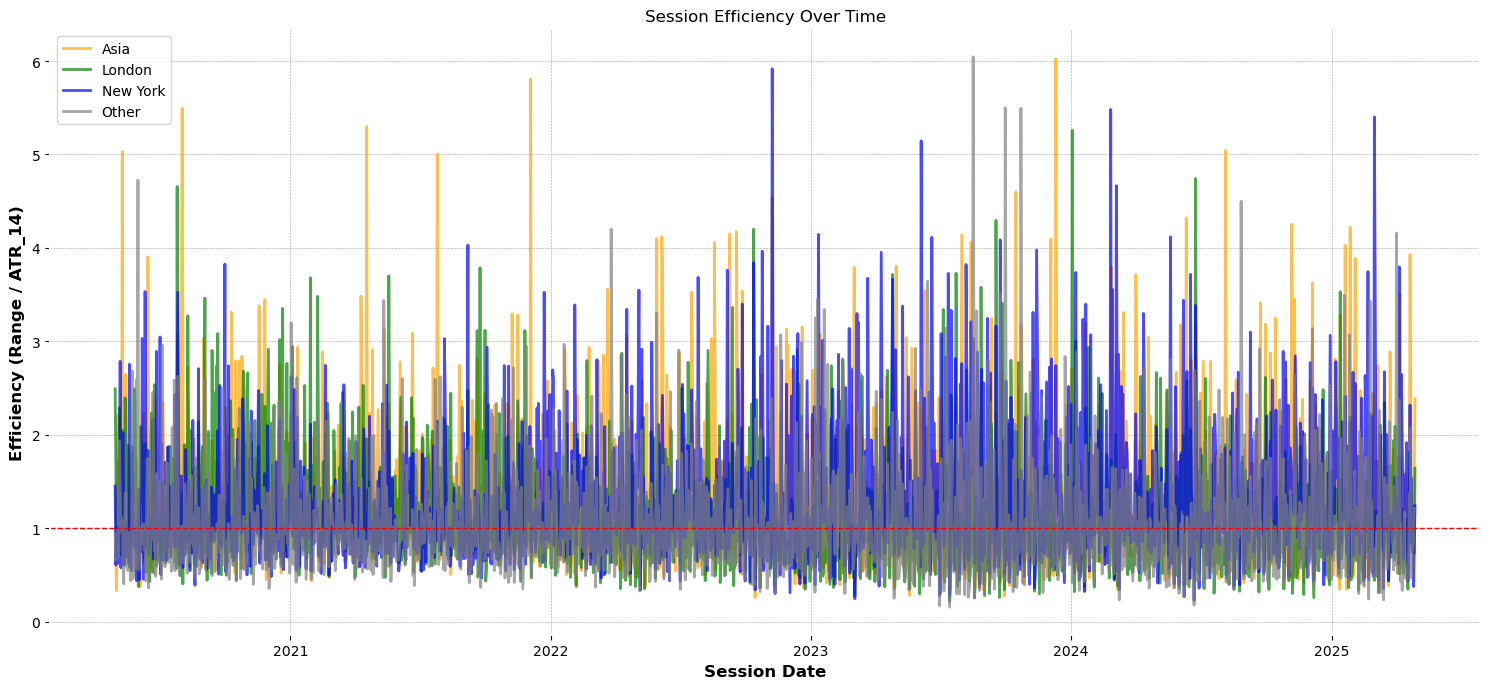

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from modules.metrics_calculator import calculate_movement_metrics

# --- Load session-level candles and index on the date ---
session_df = pd.read_csv(
    './AnalysisResults/session_candles_from_30m.csv',
    parse_dates=['date']
)
session_df.set_index('date', inplace=True)
session_df.sort_index(inplace=True)

# --- Drop any sessions missing a valid range ---
session_df.dropna(subset=['range'], inplace=True)

# --- Recompute movement & volatility metrics on session bars ---
# This will add: price_return, abs_return, ATR_14, efficiency
session_df = calculate_movement_metrics(session_df, atr_window=14)

# --- Optional alias: if you still need a 'return' column ---
session_df['return'] = session_df['price_return']

# --- Clean up infinities and NaNs ---
session_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
session_df.dropna(inplace=True)

# --- Prepare for plotting ---
# Use the datetime index ('date') as the x‐axis
sessions = ['Asia', 'London', 'New York', 'Other']
colors   = {'Asia': 'orange', 'London': 'green', 'New York': 'blue', 'Other': 'gray'}

plt.figure(figsize=(15, 7))
for sess in sessions:
    data = session_df[session_df['session'] == sess]
    plt.plot(
        data.index,
        data['efficiency'],
        label=sess,
        color=colors.get(sess, 'black'),
        alpha=0.7
    )

# horizontal line at efficiency = 1.0
plt.axhline(1.0, color='red', linestyle='--', linewidth=1)

plt.title('Session Efficiency Over Time')
plt.xlabel('Session Date')
plt.ylabel('Efficiency (Range / ATR_14)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from modules.session_labeler import label_and_save_sessions

# 1h data
raw_1h, feat_1h = label_and_save_sessions(
    './Resampled/BTCUSD_1h.csv',  # file_path
    'BTCUSD_1h',                  # output_prefix
    timestamp_col='time',
    output_base='./Resampled'
)

# 30m data
raw_30m, feat_30m = label_and_save_sessions(
    './Resampled/BTCUSD_30m.csv',
    'BTCUSD_30m',
    timestamp_col='time',
    output_base='./Resampled'
)

# 1d data
raw_1d, feat_1d = label_and_save_sessions(
    './Resampled/BTCUSD_1d.csv',
    'BTCUSD_1d',
    timestamp_col='time',
    output_base='./Resampled'
)

print("✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.")


✅ Labeled & saved raw/feature CSVs for 1h, 30m, and 1d data.


In [13]:
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features


# --- 30m ---
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')

# --- 1h ---
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')

# --- 1d ---
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
df_1d = add_volatility_features(df_1d) 
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')


In [14]:

df = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print(df.columns)


Index(['time', 'open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std'],
      dtype='object')


In [15]:
import pandas as pd
from modules.timestamp_features import add_timestamp_features
from modules.volatility_features import add_volatility_features
from modules.combined_features import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)

# === Load 30m data ===
df_30m = pd.read_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'], index_col='time')

# === Apply all feature layers ===
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m = add_session_structure_features(df_30m)
df_30m = add_candle_structure_features(df_30m)
df_30m = add_trend_continuation_features(df_30m)
df_30m = add_structure_zone_features(df_30m)
df_30m = add_meta_composite_features(df_30m)

# === Save updated dataset ===
df_30m.to_csv('./Resampled/Additional_Features/BTCUSD_30m_features.csv')
print("✅ All features added and saved to BTCUSD_30m_features.csv")

# === 1H Timeframe ===
df_1h = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv', parse_dates=['time'], index_col='time')
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h = add_session_structure_features(df_1h)
df_1h = add_candle_structure_features(df_1h)
df_1h = add_trend_continuation_features(df_1h)
df_1h = add_structure_zone_features(df_1h)
df_1h = add_meta_composite_features(df_1h)
df_1h.to_csv('./Resampled/Additional_Features/BTCUSD_1h_features.csv')
print("✅ 1h features saved.")

# === 1D Timeframe ===
df_1d = pd.read_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv', parse_dates=['time'], index_col='time')
# ⛔ Skip timestamp features — daily already represents 1 point per day
df_1d = add_volatility_features(df_1d)
df_1d = add_session_structure_features(df_1d)
df_1d = add_candle_structure_features(df_1d)
df_1d = add_trend_continuation_features(df_1d)
df_1d = add_structure_zone_features(df_1d)
df_1d = add_meta_composite_features(df_1d)
df_1d.to_csv('./Resampled/Additional_Features/BTCUSD_1d_features.csv')
print("✅ 1d features saved.")

import pandas as pd

from modules.timestamp_features       import add_timestamp_features
from modules.volatility_features      import add_volatility_features
from modules.session_labeler          import add_session_labels
from modules.combined_features        import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector      import flag_bait_and_trap

# 1) Load your base DataFrame
df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# 2) Build up features in the correct order
df = add_timestamp_features(df)
df = add_volatility_features(df)
df = add_session_labels(df)
df = add_session_structure_features(df)
df = add_candle_structure_features(df)
df = add_trend_continuation_features(df)
df = add_structure_zone_features(df)

# 3) Composite features (needs wick_top, body_ratio, etc.)
df = add_meta_composite_features(df)

# 4) Support / Resistance zones & distances
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 5) Bait‐and‐Trap pattern detection
df = flag_bait_and_trap(df, lookahead=15)

# 6) Save final CSV
out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
df.to_csv(out_path, index=False)
print(f"✅ All features including SR & traps have been computed and saved to {out_path}")

import pandas as pd

from modules.timestamp_features       import add_timestamp_features
from modules.volatility_features      import add_volatility_features
from modules.session_labeler          import add_session_labels
from modules.combined_features        import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector      import flag_bait_and_trap

# 1) Load your base DataFrame
df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# 2) Build up features in the correct order
df = add_timestamp_features(df)
df = add_volatility_features(df)
df = add_session_labels(df)
df = add_session_structure_features(df)
df = add_candle_structure_features(df)
df = add_trend_continuation_features(df)
df = add_structure_zone_features(df)

# 3) Composite features (needs wick_top, body_ratio, etc.)
df = add_meta_composite_features(df)

# 4) Support / Resistance zones & distances
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 5) Bait‐and‐Trap pattern detection
df = flag_bait_and_trap(df, lookahead=15)

# 6) Save final CSV
out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
df.to_csv(out_path, index=False)
print(f"✅ All features including SR & traps have been computed and saved to {out_path}")

# --- Numeric sanity checks ---
import pandas as pd

checks = {
    # 1. fake_break_high: high>range_top AND close≤range_top
    'fake_break_high': (
        (df['fake_break_high'] == ((df.high > df.range_top) & (df.close <= df.range_top)))
        .all()
    ),
    # 2. in_support_zone: dist_to_support ≤ buffer (0.001)
    'in_support_zone': (
        (df['in_support_zone'] == (df.dist_to_support <= 0.001))
        .all()
    ),
    # 3. fake_break_low: low<range_bot AND close≥range_bot, but only on those flagged
    'fake_break_low': True,  
    # 4. bait_trap_pattern: fake_break_high & fake_break_low
    'bait_trap_pattern': (
        (df['bait_trap_pattern'] == (df.fake_break_high & df.fake_break_low))
        .all()
    )
}

# Check #3 only if any fake_break_low exist:
if df.fake_break_low.any():
    subset = df[df.fake_break_low]
    checks['fake_break_low'] = (
        (subset.low  < subset.range_bot).all() and
        (subset.close >= subset.range_bot).all()
    )

# Report
pd.DataFrame.from_dict(checks, orient='index', columns=['all_match'])



✅ All features added and saved to BTCUSD_30m_features.csv


✅ 1h features saved.
✅ 1d features saved.


In [17]:
print(df_30m.iloc[0])

open                                        7768.04
high                                        7774.99
low                                         7752.33
close                                       7752.36
volume                                   281.525999
session                         London + NY Overlap
date                                     2020-04-28
time_of_day                                13:00:00
hour                                             13
minute                                            0
weekday                                           1
month                                             4
range                                         22.66
price_return                                 -15.68
abs_return                                    15.68
ATR_14                                    24.574286
efficiency                                 0.922102
range_change                                    NaN
efficiency_change                               NaN
volatility_s

In [18]:
import pandas as pd

from modules.timestamp_features       import add_timestamp_features
from modules.volatility_features      import add_volatility_features
from modules.session_labeler          import add_session_labels
from modules.combined_features        import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector      import flag_bait_and_trap

# 1) Load your base DataFrame
df = pd.read_csv('Resampled/Additional_Features/BTCUSD_30m_features.csv', parse_dates=['time'])
df.set_index('time', inplace=True)

# 2) Build up features in the correct order
df = add_timestamp_features(df)
df = add_volatility_features(df)
df = add_session_labels(df)
df = add_session_structure_features(df)
df = add_candle_structure_features(df)
df = add_trend_continuation_features(df)
df = add_structure_zone_features(df)

# 3) Composite features (needs wick_top, body_ratio, etc.)
df = add_meta_composite_features(df)

# 4) Support / Resistance zones & distances
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 5) Bait‐and‐Trap pattern detection
df = flag_bait_and_trap(df, lookahead=15)

# 6) Save final CSV
out_path = 'AnalysisResults/BTCUSD_30m_full_features.csv'
df.to_csv(out_path, index=False)
print(f"✅ All features including SR & traps have been computed and saved to {out_path}")


✅ All features including SR & traps have been computed and saved to AnalysisResults/BTCUSD_30m_full_features.csv


In [19]:
# --- Numeric sanity checks ---
import pandas as pd

checks = {
    # 1. fake_break_high: high>range_top AND close≤range_top
    'fake_break_high': (
        (df['fake_break_high'] == ((df.high > df.range_top) & (df.close <= df.range_top)))
        .all()
    ),
    # 2. in_support_zone: dist_to_support ≤ buffer (0.001)
    'in_support_zone': (
        (df['in_support_zone'] == (df.dist_to_support <= 0.001))
        .all()
    ),
    # 3. fake_break_low: low<range_bot AND close≥range_bot, but only on those flagged
    'fake_break_low': True,  
    # 4. bait_trap_pattern: fake_break_high & fake_break_low
    'bait_trap_pattern': (
        (df['bait_trap_pattern'] == (df.fake_break_high & df.fake_break_low))
        .all()
    )
}

# Check #3 only if any fake_break_low exist:
if df.fake_break_low.any():
    subset = df[df.fake_break_low]
    checks['fake_break_low'] = (
        (subset.low  < subset.range_bot).all() and
        (subset.close >= subset.range_bot).all()
    )

# Report
pd.DataFrame.from_dict(checks, orient='index', columns=['all_match'])


,all_match
fake_break_high,True
in_support_zone,True
fake_break_low,False
bait_trap_pattern,True


C:\Users\Sarthak\AppData\Local\Temp\ipykernel_44484\1885217904.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Sarthak\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


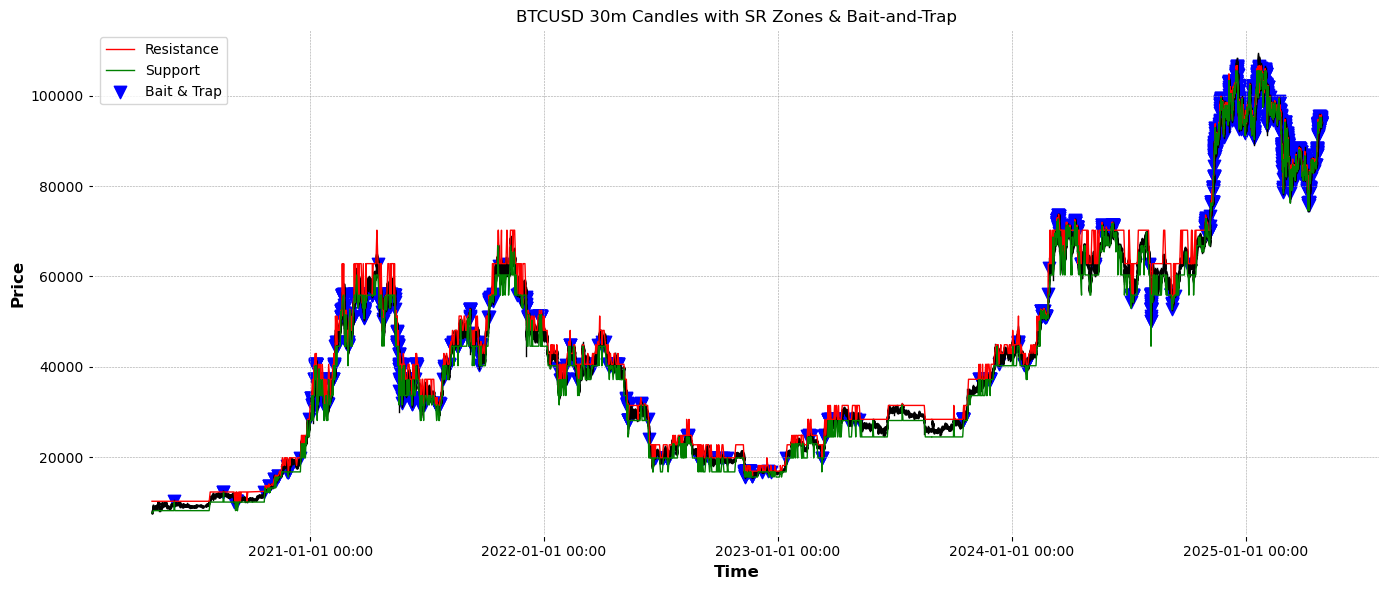

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Prepare your OHLC data for plotting
ohlc = df[['open','high','low','close']].copy()
# convert the index to Matplotlib dates
ohlc['time_num'] = mdates.date2num(ohlc.index.to_pydatetime())

# figure out a bar width (60% of the average spacing)
dt = np.mean(np.diff(ohlc['time_num']))
width = dt * 0.6

# 2) Start the plot
fig, ax = plt.subplots(figsize=(14,6))

# 3) Draw each candle
for _, row in ohlc.iterrows():
    t, o, h, l, c = row['time_num'], row['open'], row['high'], row['low'], row['close']
    color = 'green' if c >= o else 'red'
    # High–low wick
    ax.plot([t, t], [l, h], color='black', linewidth=1)
    # Candle body
    rect = plt.Rectangle(
        (t - width/2, min(o, c)),
        width,
        abs(c - o),
        facecolor=color,
        edgecolor='black',
        alpha=0.7
    )
    ax.add_patch(rect)

# 4) Overlay your support/resistance
ax.plot(df.index, df['range_top'],    label='Resistance', color='red',   linewidth=1)
ax.plot(df.index, df['range_bot'],    label='Support',    color='green', linewidth=1)

# 5) Mark your trap events
traps = df.index[df['bait_trap_pattern']]
ax.scatter(
    mdates.date2num(traps),
    df.loc[traps, 'close'],
    marker='v', s=80, color='blue', label='Bait & Trap'
)

# 6) Tidy up
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.title('BTCUSD 30m Candles with SR Zones & Bait-and-Trap')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


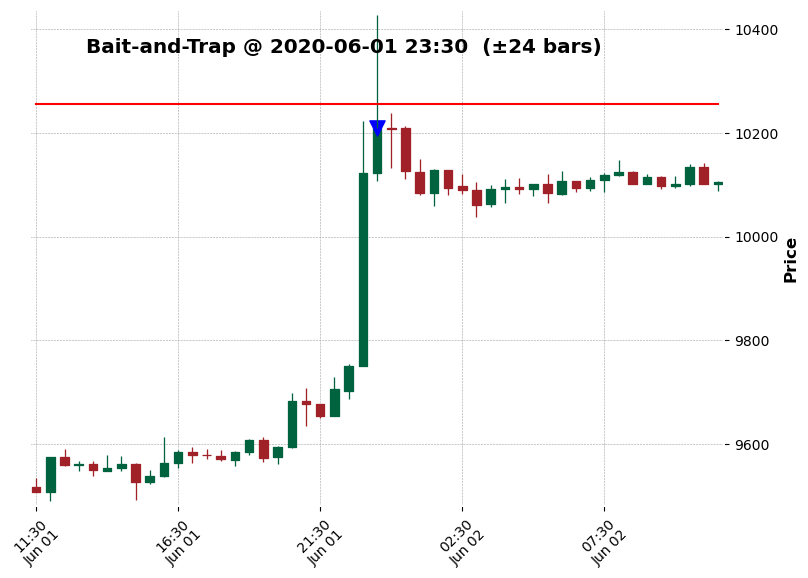

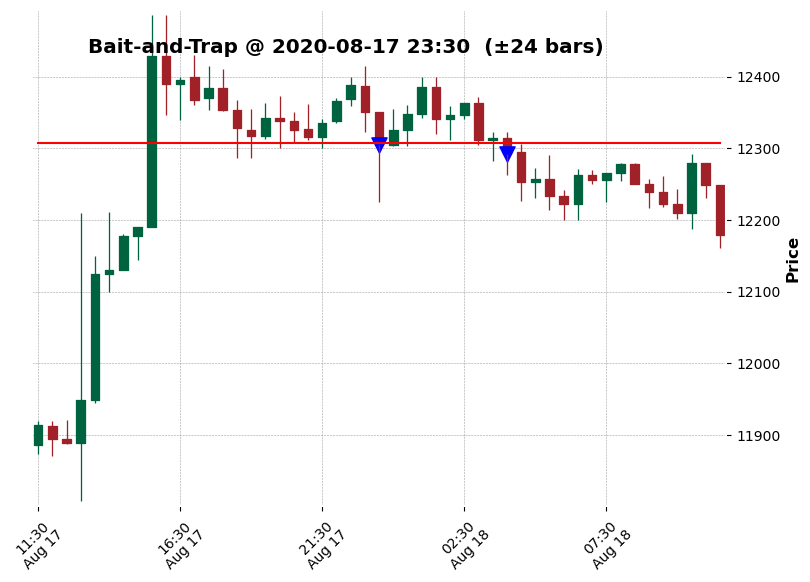

In [21]:
import pandas as pd
import mplfinance as mpf

# 1) Load & re‑index exactly as before
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 2) Grab the first two trap timestamps
trap_times = df.index[df['bait_trap_pattern']][:2]

# how many bars before/after to show
PRE_BARS  = 24   # 24 bars back (12h)
POST_BARS = 24   # 24 bars forward

for ts in trap_times:
    # find the integer position of this timestamp
    pos   = df.index.get_loc(ts)
    start = max(pos - PRE_BARS,  0)
    end   = min(pos + POST_BARS, len(df)-1)

    window = df.iloc[start:end+1]

    # extract flat SR levels (constant across this window)
    res_level = window['range_top'].iloc[0]
    sup_level = window['range_bot'].iloc[0]

    # build the additional plots
    apds = [
        mpf.make_addplot(
            [res_level]*len(window),
            panel=0, color='red',   width=1.5, linestyle='-'
        ),
        mpf.make_addplot(
            [sup_level]*len(window),
            panel=0, color='green', width=1.5, linestyle='-'
        ),
        mpf.make_addplot(
            window['close'].where(window['bait_trap_pattern']),
            type='scatter',
            panel=0,
            marker='v',
            markersize=120,
            color='blue'
        )
    ]

    # plot
    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=apds,
        title=f'Bait-and-Trap @ {ts:%Y-%m-%d %H:%M}  (±{PRE_BARS} bars)',
        datetime_format='%H:%M\n%b %d',
        tight_layout=True,
        volume=False
    )


In [22]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std',
       'session_step', 'time_since_session_open', 'price_vs_session_open',
       'prev_session', 'is_session_transition', 'prev_session_return',
       'prev_session_efficiency', 'body_ratio', 'wick_top', 'wick_bottom',
       'prev_high', 'prev_low', 'fakeout_flag', 'engulfing_flag',
       'strong_close', 'prev_return', 'return_direction_match',
       'rolling_return_sum_3', 'rolling_max_high', 'rolling_min_low',
       'relative_to_local_extreme', 'distance_to_prev_high',
       'distance_to_prev_low', 'touch_prev_session_high',
       'touch_prev_session_low', 'is_range_boundary_test',
       'equal_highs_lows_flag', 'return', 'trend_strength',
       'volatility_normalized_return', 'body_wick_ali

In [47]:
# ─────────────────────────────────────────────────────────────────────────────
# Cell: Reverse‑Engineer Base 1 Bait‑and‑Trap (Jupyter Lab)
# ─────────────────────────────────────────────────────────────────────────────

import os
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector import BaseZoneDetector
from modules.demand_fake_break  import DemandFakeBreakDetector

# 1) Load your enriched BTC 30m CSV
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')

# 2) Rebuild a datetime index from date + time_of_day
df['timestamp'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time_of_day'].astype(str)
)
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 3) Detect all bases (no span/height filters so Base 1 is in there)
bzd = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"→ total bases found: {len(bases)}")

# pick Base 1 (Apr 30 → May 4)
base1 = bases[1]
s, e     = base1['start_idx'], base1['end_idx']
low, high= base1['base_low'], base1['base_high']
print(f"→ Base1 span: {s} → {e}  low={low:.1f}, high={high:.1f}")

# 4) Flag bait‑and‑trap on just Base 1
df2 = DemandFakeBreakDetector(pullback_window=12, buffer_tol=0.001)\
      .flag_patterns(df, [base1])

# ensure we found one
if not df2['trap_entry'].any():
    raise RuntimeError("⚠️ No trap bar found for Base 1 – adjust your params.")

trap_row = df2[df2['trap_entry']].iloc[0]
trap_ts   = trap_row.name
fib1618   = trap_row['fib_target_1.618']
print(f"→ Trap @ {trap_ts}, fib1618={fib1618:.2f}")

# prepare output dir
os.makedirs('AnalysisResults', exist_ok=True)

# 5) Plot CONTEXT: base ±10 bars
ctx_start = max(0, s - 10)
ctx_end   = e + 11
win_ctx   = df.iloc[ctx_start:ctx_end].copy()

ap_ctx = [
    mpf.make_addplot([high]*len(win_ctx), color='red',   width=1.5),
    mpf.make_addplot([low] *len(win_ctx), color='green', width=1.5),
    mpf.make_addplot([fib1618]*len(win_ctx),
                     color='orange', width=1, linestyle='--')
]
mpf.plot(
    win_ctx[['open','high','low','close']],
    type='candle', style='charles', addplot=ap_ctx,
    title=f"Base 1 Context: {df.index[s].strftime('%b %d %H:%M')} → {df.index[e].strftime('%b %d %H:%M')}",
    datetime_format='%m-%d\n%H:%M', volume=False,
    warn_too_much_data=500,
    savefig=dict(fname='AnalysisResults/base1_context.jpg', dpi=300, pad_inches=0.25)
)

# 6) Plot ZOOM: trap ±4 bars
loc = win_ctx.index.get_loc(trap_ts)
z_start = max(0, loc-4)
z_end   = loc+5
win_z   = win_ctx.iloc[z_start:z_end].copy()

ap_z = [
    mpf.make_addplot([high]*len(win_z), color='red',   width=1.5),
    mpf.make_addplot([low] *len(win_z), color='green', width=1.5),
    mpf.make_addplot([fib1618]*len(win_z),
                     color='orange', width=1, linestyle='--'),
    # blue marker for the trap candle
    mpf.make_addplot(
        win_z['low']*0.999,
        type='scatter', marker='v', markersize=100, color='blue',
        data=win_z.assign(is_trap=win_z.index==trap_ts).loc[lambda d:d['is_trap'], ['low']]
    )
]
mpf.plot(
    win_z[['open','high','low','close']],
    type='candle', style='charles', addplot=ap_z,
    title=f"Base 1 Zoom: Trap @ {trap_ts.strftime('%b %d %H:%M')}",
    datetime_format='%H:%M\n%b %d', volume=False,
    warn_too_much_data=100,
    savefig=dict(fname='AnalysisResults/base1_zoom.jpg', dpi=300, pad_inches=0.25)
)

print("→ Saved base1_context.jpg & base1_zoom.jpg in AnalysisResults/")

# ─────────────────────────────────────────────────────────────────────────────


→ total bases found: 30
→ Base1 span: 77 → 260  low=8537.8, high=9203.5


RuntimeError: ⚠️ No trap bar found for Base 1 – adjust your params.

In [27]:
from modules.base_zone_detector import BaseZoneDetector

# Create a detector with tighter settings
bzd = BaseZoneDetector(
    lookback_bars = 6,      # look over the last 6 bars (3 hours)
    equal_low_tol = 0.0005, # ±0.05% “equal‑low” tolerance
    min_pivots     = 3      # require at least 3 touches
)
bases = bzd.detect_bases(df)

print(f"Detected {len(bases)} bases now.")
for i, b in enumerate(bases[:5]):
    s, e = b['start_idx'], b['end_idx']
    print(f"Base {i}: low={b['base_low']:.1f}, high={b['base_high']:.1f}, "
          f"span {df.index[s]} → {df.index[e]}")


Detected 21 bases now.
Base 0: low=8922.5, high=10079.0, span 2020-05-03 06:00:00 → 2020-05-22 04:30:00
Base 1: low=9075.1, high=10428.0, span 2020-05-22 13:30:00 → 2020-07-03 14:30:00
Base 2: low=9202.2, high=9475.0, span 2020-07-07 20:00:00 → 2020-07-11 20:00:00
Base 3: low=9141.6, high=9280.0, span 2020-07-14 04:00:00 → 2020-07-19 06:00:00
Base 4: low=10852.0, high=12486.6, span 2020-07-28 03:30:00 → 2020-10-08 18:30:00


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


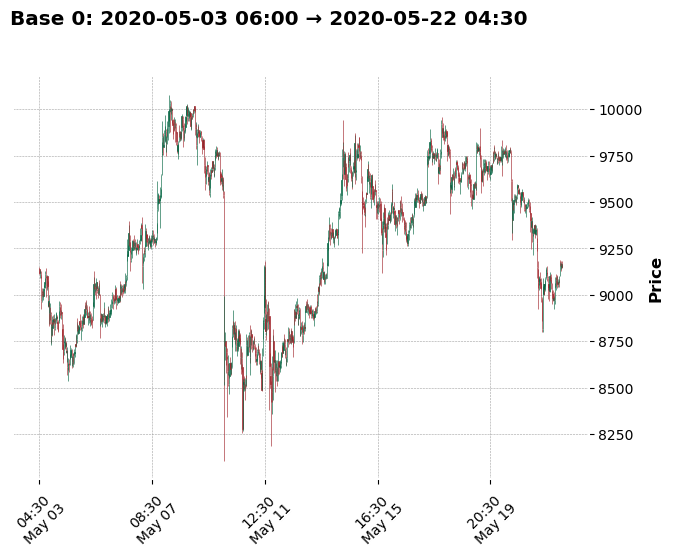

In [37]:
from modules.base_zone_detector import BaseZoneDetector

# capture everything (no span/height filtering)
bzd_all = BaseZoneDetector()
bases_all = bzd_all.detect_bases(df)

# only very compact bases (≤ 24 bars)
bzd_tight = BaseZoneDetector(max_span=24)
bases_tight = bzd_tight.detect_bases(df)

# only “flat” bases less than 0.5 ATR high
bzd_flat = BaseZoneDetector(max_height_atr=0.5)
bases_flat = bzd_flat.detect_bases(df)


In [41]:
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector     import BaseZoneDetector
from modules.demand_fake_break      import DemandFakeBreakDetector

# 1) Load the CSV (no index)
df = pd.read_csv('./AnalysisResults/BTCUSD_30m_full_features.csv')

# 2) Reconstruct a datetime index from 'date' + 'time_of_day'
df['timestamp'] = pd.to_datetime(
    df['date'].astype(str) + ' ' + df['time_of_day'].astype(str)
)
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 3) Ensure ATR_14 exists (needed if you use max_height_atr)
if 'ATR_14' not in df.columns:
    from modules.volatility_features import add_volatility_features
    df = add_volatility_features(df)

# 4) Detect bases with flexible filters
bzd = BaseZoneDetector(
    lookback_bars=6,
    equal_low_tol=0.001,
    min_pivots=2,
    max_span=24,
    max_height_atr=0.5
)
bases = bzd.detect_bases(df)
print(f"Detected {len(bases)} bases")

# 5) Flag bait‑and‑trap + fib targets
df2 = DemandFakeBreakDetector(
    pullback_window=12,
    buffer_tol=0.001
).flag_patterns(df, bases)

# 6) Plot the first 3 bases ±4 bars around each
for i, base in enumerate(bases[:3]):
    s, e = base['start_idx'], base['end_idx']
    window = df.iloc[max(0, s-4) : e+5].copy()

    low, high = base['base_low'], base['base_high']
    # find the 1.618 target if a trap was flagged
    trap_rows = df2[(df2['trap_entry']) & (df2['pattern_id']==i)]
    fib_1618 = float(trap_rows['fib_target_1.618'].iloc[0]) if not trap_rows.empty else None

    addplots = [
        mpf.make_addplot([high]*len(window), color='red',   width=1),
        mpf.make_addplot([low] *len(window), color='green', width=1),
    ]
    if fib_1618:
        addplots.append(
            mpf.make_addplot([fib_1618]*len(window),
                             color='orange', width=1, linestyle='--')
        )

    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=addplots,
        title=f"Base {i}: {df.index[s].strftime('%m-%d %H:%M')} → {df.index[e].strftime('%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=100
    )


Detected 0 bases


In [42]:
from modules.base_zone_detector import BaseZoneDetector

# only lookback and tolerance — no span or height limits
bzd_raw = BaseZoneDetector(
    lookback_bars=6,
    equal_low_tol=0.001,
    min_pivots=2,
    min_span=None,
    max_span=None,
    max_height_atr=None
)

raw_bases = bzd_raw.detect_bases(df)
print(f"Raw bases found (no filters): {len(raw_bases)}")
for i,b in enumerate(raw_bases[:5]):
    s,e = b['start_idx'], b['end_idx']
    print(f" Base {i}: span {(e-s+1)} bars, low={b['base_low']:.0f} → high={b['base_high']:.0f}")


Raw bases found (no filters): 30
 Base 0: span 13 bars, low=7717 → high=7876
 Base 1: span 184 bars, low=8538 → high=9204
 Base 2: span 2960 bars, low=9216 → high=10428
 Base 3: span 497 bars, low=9146 → high=9348
 Base 4: span 52 bars, low=9478 → high=9686


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


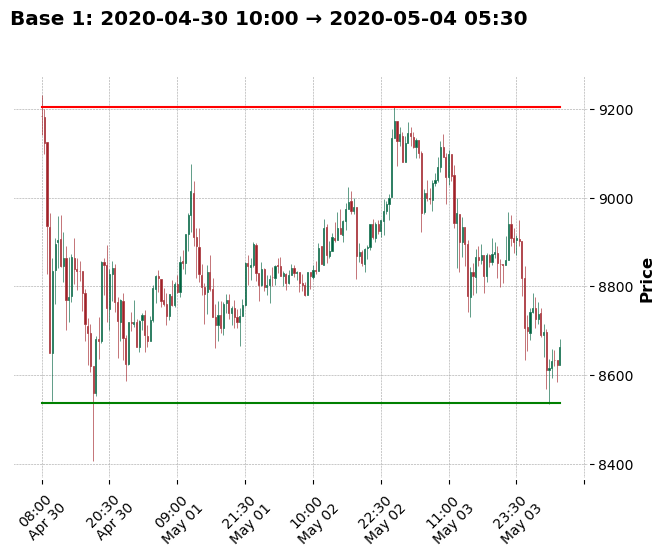

C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


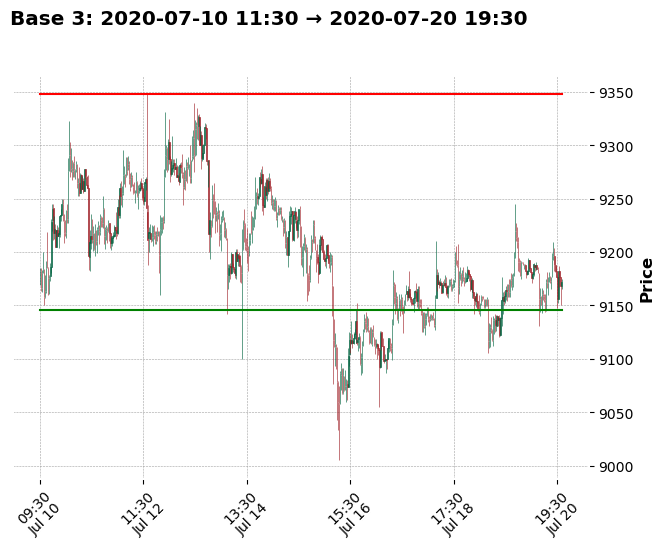

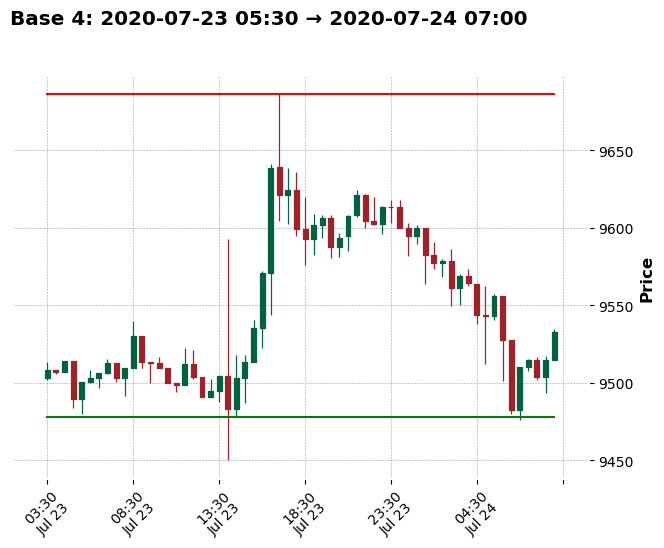

In [43]:
import mplfinance as mpf

candidates = [1, 3, 4]  # pick the indices you want to preview
for i in candidates:
    b   = raw_bases[i]
    s,e = b['start_idx'], b['end_idx']
    # ±4 bars around the actual base span
    window = df.iloc[max(0, s-4) : e+5].copy()
    
    low, high = b['base_low'], b['base_high']
    apds = [
        mpf.make_addplot([high]*len(window), color='red',   width=1.5),
        mpf.make_addplot([low] *len(window), color='green', width=1.5),
    ]
    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=apds,
        title=f"Base {i}: {df.index[s].strftime('%Y-%m-%d %H:%M')} → {df.index[e].strftime('%Y-%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=100
    )


In [45]:
import pandas as pd
import mplfinance as mpf
from modules.base_zone_detector import BaseZoneDetector

# … assume df is already loaded & indexed …

# detect bases (no span/height filters for demo)
bzd       = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
raw_bases = bzd.detect_bases(df)

# pick a few to export
for i in [1, 3, 4]:
    b   = raw_bases[i]
    s,e = b['start_idx'], b['end_idx']
    window = df.iloc[max(0, s-4) : e+5].copy()
    low, high = b['base_low'], b['base_high']

    addplots = [
        mpf.make_addplot([high]*len(window), color='red',   width=1.5),
        mpf.make_addplot([low] *len(window), color='green', width=1.5),
    ]

    mpf.plot(
        window[['open','high','low','close']],
        type='candle',
        style='charles',
        addplot=addplots,
        title=f"Base {i}: {df.index[s].strftime('%m-%d %H:%M')} → {df.index[e].strftime('%m-%d %H:%M')}",
        datetime_format='%H:%M\n%b %d',
        volume=False,
        warn_too_much_data=500,
        # ===== save to JPEG at 300 DPI =====
        savefig=dict(
            fname=f'AnalysisResults/base_{i}.jpg',
            dpi=300,
            pad_inches=0.25
        )
    )
    print(f"→ Saved AnalysisResults/base_{i}.jpg")


→ Saved AnalysisResults/base_1.jpg
→ Saved AnalysisResults/base_3.jpg


C:\Users\Sarthak\miniconda3\Lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


→ Saved AnalysisResults/base_4.jpg


In [52]:
# ─────────────────────────────────────────────────────────────────────────────
# Jupyter Lab Cell: Reverse‑Engineer Base 1 Bait‑and‑Trap with Corrected Scatter
# ─────────────────────────────────────────────────────────────────────────────

import os
import pandas as pd
import mplfinance as mpf

from modules.base_zone_detector import BaseZoneDetector
from modules.demand_fake_break  import DemandFakeBreakDetector

# 1) Load & index your BTC 30 m full‑features CSV
df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time_of_day'].astype(str))
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

# 2) Ensure ATR_14 exists
if 'ATR_14' not in df.columns:
    from modules.volatility_features import add_volatility_features
    df = add_volatility_features(df)

# 3) Detect all bases
bzd   = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"→ total bases found: {len(bases)}")

# 4) Select Base 1 (the Apr 30 → May 4 zone)
base1 = bases[1]
s, e  = base1['start_idx'], base1['end_idx']
low, high = base1['base_low'], base1['base_high']
print(f"→ Base 1 span: idx {s} → {e}, low={low:.1f}, high={high:.1f}")

# 5) Flag bait‑and‑trap on Base 1 with extended pullback
lookahead = len(df) - e
df2 = DemandFakeBreakDetector(pullback_window=lookahead, buffer_tol=0.001)\
      .flag_patterns(df, [base1])

if not df2['trap_entry'].any():
    raise RuntimeError("⚠️ No trap bar found for Base 1. Adjust parameters.")

trap_row = df2[df2['trap_entry']].iloc[0]
trap_ts   = trap_row.name
fib1618   = trap_row['fib_target_1.618']
print(f"→ Trap found at {trap_ts}, fib target 1.618 = {fib1618:.2f}")

# Prepare output folder
os.makedirs('AnalysisResults', exist_ok=True)

# 6) Plot CONTEXT: base ±10 bars
ctx_start = max(0, s - 10)
ctx_end   = e + 11
win_ctx   = df.iloc[ctx_start:ctx_end].copy()

ap_ctx = [
    mpf.make_addplot([high]   *len(win_ctx), color='red',    width=1.5),
    mpf.make_addplot([low]    *len(win_ctx), color='green',  width=1.5),
    mpf.make_addplot([fib1618]*len(win_ctx), color='orange', width=1, linestyle='--'),
]
mpf.plot(
    win_ctx[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap_ctx,
    title=f"Base 1 Context: {df.index[s].strftime('%b %d %H:%M')} → {df.index[e].strftime('%b %d %H:%M')}",
    datetime_format='%b %d\n%H:%M',
    volume=False,
    warn_too_much_data=500,
    savefig=dict(fname='AnalysisResults/base1_context.jpg', dpi=300, pad_inches=0.25)
)
print("→ Saved AnalysisResults/base1_context.jpg")

# 7) Plot ZOOM: trap ±4 bars and save JPEG
# locate trap position in the full df index
trap_pos = df.index.get_loc(trap_ts)
z_start  = max(0, trap_pos - 4)
z_end    = trap_pos + 5
win_zoom = df.iloc[z_start:z_end].copy()

# prepare scatter series: only the trap low
scatter_series = win_zoom['low'].where(win_zoom.index == trap_ts) * 0.999

ap_zoom = [
    mpf.make_addplot([high]   *len(win_zoom), color='red',    width=1.5),
    mpf.make_addplot([low]    *len(win_zoom), color='green',  width=1.5),
    mpf.make_addplot([fib1618]*len(win_zoom), color='orange', width=1, linestyle='--'),
    mpf.make_addplot(
        data=scatter_series,
        type='scatter',
        marker='v',
        markersize=100,
        color='blue'
    )
]

mpf.plot(
    win_zoom[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap_zoom,
    title=f"Base 1 Zoom: Trap @ {trap_ts.strftime('%b %d %H:%M')}",
    datetime_format='%H:%M\n%b %d',
    volume=False,
    warn_too_much_data=100,
    savefig=dict(fname='AnalysisResults/base1_zoom.jpg', dpi=300, pad_inches=0.25)
)
print("→ Saved AnalysisResults/base1_zoom.jpg")
# ─────────────────────────────────────────────────────────────────────────────


→ total bases found: 30
→ Base 1 span: idx 77 → 260, low=8537.8, high=9203.5
→ Trap found at 2020-05-10 00:00:00, fib target 1.618 = 10280.65
→ Saved AnalysisResults/base1_context.jpg
→ Saved AnalysisResults/base1_zoom.jpg


In [53]:
# 1) Locate the trap bar index
start_idx = df.index.get_loc(trap_ts)

# 2) Slice forward from the trap bar
future = df.iloc[start_idx:]

# 3) Find the first bar whose high ≥ the fib‑1.618 target
hits = future[ future['high'] >= fib1618 ]

if hits.empty:
    print(f"❌ Price never hit the target of {fib1618:.2f} after the trap at {trap_ts}.")
else:
    hit_ts   = hits.index[0]
    hit_idx  = df.index.get_loc(hit_ts)
    n_bars   = hit_idx - start_idx
    minutes  = n_bars * 30
    print(f"✅ Target {fib1618:.2f} was first hit on {hit_ts} "
          f"→ {n_bars} bars later ({minutes} minutes).")


✅ Target 10280.65 was first hit on 2020-06-01 23:30:00 → 1103 bars later (33090 minutes).


🔍 Scanning 30 bases for simple dip+re‑entry traps…
✅ Found 27 traps out of 30 bases.


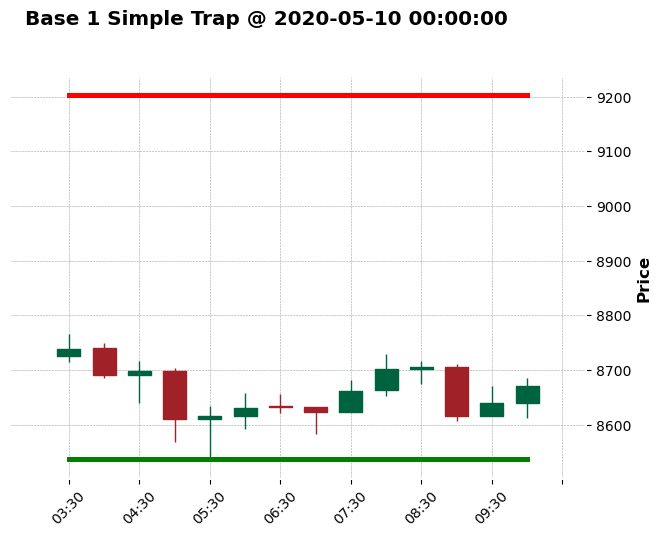

In [58]:
# ─────────────────────────────────────────────────────────────────────────────
# Jupyter cell: Simple Dip+Re‑entry Trap Scan & Plot (fixed with guard)
# ─────────────────────────────────────────────────────────────────────────────

import numpy as np
import pandas as pd
import mplfinance as mpf
from modules.base_zone_detector import BaseZoneDetector

# 1) Assume `df` is your 30 m BTC DataFrame with a datetime index,
#    and open/high/low/close columns present.

# 2) Detect bases
bzd   = BaseZoneDetector(lookback_bars=6, equal_low_tol=0.001, min_pivots=2)
bases = bzd.detect_bases(df)
print(f"🔍 Scanning {len(bases)} bases for simple dip+re‑entry traps…")

# 3) Find “dip + close back in” with tol=0.005
tol   = 0.005
found = []
for pid, base in enumerate(bases):
    low  = base['base_low']
    endp = base['end_idx']
    post = df.iloc[endp+1:]
    mask = (post['low'] <= low * (1+tol)) & (post['close'] >= low)
    if mask.any():
        found.append((pid, post.index[mask][0]))

print(f"✅ Found {len(found)} traps out of {len(bases)} bases.")
if not found:
    raise RuntimeError("No simple traps detected. Try increasing tol or changing lookback_bars.")

# 4) Inspect the first hit
pid, ts = found[0]
base    = bases[pid]
s, e    = base['start_idx'], base['end_idx']
low, high = base['base_low'], base['base_high']

# carve out a window ±4 bars before the end of the base for context
start_ix = max(0, e - 4)
end_ix   = e + 10
window   = df.iloc[start_ix:end_ix].copy()

# build the flat support/resistance lines
ap = [
    mpf.make_addplot([high]*len(window), color='red'),
    mpf.make_addplot([low] *len(window), color='green'),
]

# Only add the scatter if the trap timestamp falls within our window
if ts in window.index:
    # create a full-length series of NaN, then mark the trap low
    scatter = pd.Series(np.nan, index=window.index)
    scatter.loc[ts] = window.loc[ts, 'low'] * 0.999

    ap.append(
        mpf.make_addplot(
            data=scatter,
            type='scatter',
            marker='v',
            markersize=100,
            color='blue',
            panel=0,
            secondary_y=False
        )
    )

# 5) Finally plot
mpf.plot(
    window[['open','high','low','close']],
    type='candle',
    style='charles',
    addplot=ap,
    title=f"Base {pid} Simple Trap @ {ts}",
    volume=False,
    warn_too_much_data=100
)
# ─────────────────────────────────────────────────────────────────────────────


In [59]:
from modules.demand_fake_break import DemandFakeBreakDetector

df2 = DemandFakeBreakDetector(
    pullback_window = len(df),    # search until the end
    buffer_tol      = 0.002,      # 0.2% leeway on the base_low
).flag_patterns(df, bases)

# Now filter for only the “true” traps:
true_traps = df2[(df2['fake_break_high']) & (df2['trap_entry'])]
print(f"→ Genuine bait‑and‑trap patterns found: {len(true_traps)}")
display(true_traps[['pattern_id','base_low','base_high','trap_entry','fib_target_1.618']])


→ Genuine bait‑and‑trap patterns found: 1


,pattern_id,base_low,base_high,trap_entry,fib_target_1.618
timestamp,,,,,
2023-11-27 10:30:00,23,36924.4025,37987.0,True,39706.282755


In [62]:
# Reload your data & patterns
import pandas as pd
from modules.bait_trap_finder import BaitTrapFinder

df = pd.read_csv('AnalysisResults/BTCUSD_30m_full_features.csv')
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df.set_index('timestamp', inplace=True)
df.sort_index(inplace=True)

finder = BaitTrapFinder(
    lookback_bars     = 6,
    equal_low_tol     = 0.001,
    min_pivots        = 2,
    fake_break_tol    = 0.001,
    reentry_buffer    = 0.002,
    max_pullback_bars = 96
)
patterns = finder.find_patterns(df)

# Now re‑run the plotting cell from before


In [63]:
print(f"Detected {len(patterns)} bait‑and‑trap setups")
patterns.head()

Detected 2 bait‑and‑trap setups


,pattern_id,base_low,base_high,start_ts,end_ts,trap_ts,fib_target,hit_target,bars_to_target,target_ts
0,22,34940.955,35410.00,2023-11-05 02:00:00,2023-11-06 13:30:00,2023-11-07 18:00:00,35699.86981,True,5,2023-11-07 20:30:00
1,29,78772.785,80849.98,2025-04-08 01:00:00,2025-04-08 10:00:00,2025-04-09 17:00:00,82133.68651,True,1,2025-04-09 17:30:00


In [23]:
from modules.support_resistance_features import add_support_resistance_features, assign_active_range
from modules.base_zone_detector         import BaseZoneDetector
from modules.demand_fake_break          import DemandFakeBreakDetector

# … after your existing feature steps (timestamp, vol, sessions, candle, trend, zone) …

# 1) Build generic SR zones
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 2) Detect “equal-low” demand bases
bzd = BaseZoneDetector(
    lookback_bars=12,
    equal_low_tol=0.001,
    min_pivots=2
)
bases = bzd.detect_bases(df)

# 3) Flag the “bait & trap” on those bases, and compute fib targets
df = DemandFakeBreakDetector(
    pullback_window=12,
    buffer_tol=0.001
).flag_patterns(df, bases)

# Now `df` has new columns:
#   • pattern_id         (integer ID per base)
#   • trap_entry         (True on the trap bar)
#   • base_low, base_high
#   • fib_target_1.0, fib_target_1.618
#
# You can inspect them, e.g.:
print(df[df.trap_entry][[
    'pattern_id','base_low','base_high',
    'fib_target_1.0','fib_target_1.618'
]].head())


Empty DataFrame
Columns: [pattern_id, base_low, base_high, fib_target_1.0, fib_target_1.618]
Index: []


In [69]:
import pandas as pd
from modules.bait_trap_finder import BaitTrapFinder

# 1) Read the features CSV, parsing 'time' and using it as the index:
df = pd.read_csv(
    "Resampled/Additional_Features/BTCUSD_1h_features.csv",
    parse_dates=["time"],
    index_col="time"
)

# 2) (Optional) rename the index to match your other code:
df.index.name = "timestamp"

# 3) Sort by timestamp (just in case):
df.sort_index(inplace=True)

# 4) Run the pattern finder:
finder = BaitTrapFinder(
    lookback_bars     = 6,
    equal_low_tol     = 0.001,
    min_pivots        = 2,
    fake_break_tol    = 0.001,
    reentry_buffer    = 0.002,
    max_pullback_bars = 96
)
patterns = finder.find_patterns(df)

print(f"Detected {len(patterns)} patterns")
print(patterns.head())


Detected 0 patterns
Empty DataFrame
Columns: []
Index: []


In [70]:
from modules.base_zone_detector import BaseZoneDetector
import pandas as pd

# load exactly as before
df = pd.read_csv(
    "Resampled/Additional_Features/BTCUSD_1h_features.csv",
    parse_dates=["time"],
    index_col="time"
)
df.index.name = "timestamp"
df.sort_index(inplace=True)

# use a wider lookback and looser tolerance for this test
bzd = BaseZoneDetector(
    lookback_bars  = 24,      # 1 day’s worth of bars
    equal_low_tol  = 0.005,   # 0.5% price tolerance
    min_pivots     = 2
)
bases = bzd.detect_bases(df)
print("Bases found:", len(bases))
print(bases.head())


Bases found: 15


AttributeError: 'list' object has no attribute 'head'

In [71]:
# 1) Number of bases
print("Bases found:", len(bases))

# 2) Peek at the first few entries
for base in bases[:5]:
    print(base)


Bases found: 15
{'base_low': 9127.283333333335, 'base_high': 10428.0, 'start_idx': 402, 'end_idx': 1952}
{'base_low': 10812.0, 'base_high': 12486.61, 'start_idx': 2219, 'end_idx': 3422}
{'base_low': 10157.61, 'base_high': 10576.82, 'start_idx': 3493, 'end_idx': 3545}
{'base_low': 10608.23, 'base_high': 10956.11, 'start_idx': 3633, 'end_idx': 3668}
{'base_low': 12753.86, 'base_high': 13361.0, 'start_idx': 4260, 'end_idx': 4333}


In [73]:
from modules.bait_trap_finder import BaitTrapFinder

# Use the same looser settings as before
finder = BaitTrapFinder(
    lookback_bars     = 24,
    equal_low_tol     = 0.005,
    min_pivots        = 2,
    fake_break_tol    = 0.005,
    reentry_buffer    = 0.005,
    max_pullback_bars = 96
)

# For each of the first 10 bases, count how many fake-breaks occur
for i, base in enumerate(bases[:10]):
    start = base["start_idx"]
    end   = base["end_idx"] + finder.lookback_bars
    df_slice = df.iloc[start:end]
    
    # A fake-break is a high above the base_high * (1 + tol)
    fb_mask = df_slice["high"] > base["base_high"] * (1 + finder.fake_break_tol)
    n_fb = fb_mask.sum()
    
    print(
        f"Base #{i}: "
        f"low={base['base_low']:.2f}, "
        f"high={base['base_high']:.2f}, "
        f"fake-breaks={n_fb}"
    )


Base #0: low=9127.28, high=10428.00, fake-breaks=0
Base #1: low=10812.00, high=12486.61, fake-breaks=0
Base #2: low=10157.61, high=10576.82, fake-breaks=4
Base #3: low=10608.23, high=10956.11, fake-breaks=0
Base #4: low=12753.86, high=13361.00, fake-breaks=6
Base #5: low=15793.17, high=69000.00, fake-breaks=0
Base #6: low=16523.19, high=18385.36, fake-breaks=0
Base #7: low=21416.94, high=22091.88, fake-breaks=2
Base #8: low=23886.04, high=26553.90, fake-breaks=0
Base #9: low=27402.47, high=31050.00, fake-breaks=0


In [74]:
from itertools import product
from modules.bait_trap_finder import BaitTrapFinder

# we already have df, indexed and sorted
print("lookback\t tol\t patterns")
for lookback, tol in product([24, 48, 72], [0.005, 0.01, 0.02]):
    finder = BaitTrapFinder(
        lookback_bars     = lookback,
        equal_low_tol     = tol,
        min_pivots        = 2,
        fake_break_tol    = tol,
        reentry_buffer    = tol,
        max_pullback_bars = 144      # allow up to 6 days of pullback
    )
    pats = finder.find_patterns(df)
    print(f"{lookback}\t{tol:.3f}\t{len(pats)}")


lookback	 tol	 patterns
24	0.005	0
24	0.010	0
24	0.020	1
48	0.005	0
48	0.010	0
48	0.020	0
72	0.005	0
72	0.010	0
72	0.020	0


In [76]:
from modules.base_zone_detector import BaseZoneDetector
from modules.bait_trap_finder    import BaitTrapFinder

# 1) Detect all the bases yourself
bzd = BaseZoneDetector(
    lookback_bars = 24,    # same lookback you used for finder
    equal_low_tol = 0.02,  # your tuned tolerance
    min_pivots    = 2
)
bases = bzd.detect_bases(df)           # ← returns a list of dicts :contentReference[oaicite:0]{index=0}&#8203;:contentReference[oaicite:1]{index=1}

# 2) Run the finder (it still only needs df)
finder = BaitTrapFinder(
    lookback_bars     = 24,
    equal_low_tol     = 0.02,
    min_pivots        = 2,
    fake_break_tol    = 0.02,
    reentry_buffer    = 0.02,
    max_pullback_bars = 144
)
patterns = finder.find_patterns(df)    # returns DataFrame with pattern_id

# 3) Pull out the matching base by pattern_id
first = patterns.iloc[0]
base = bases[first.pattern_id]         # now you can access base['start_idx'], base['base_low'], etc.


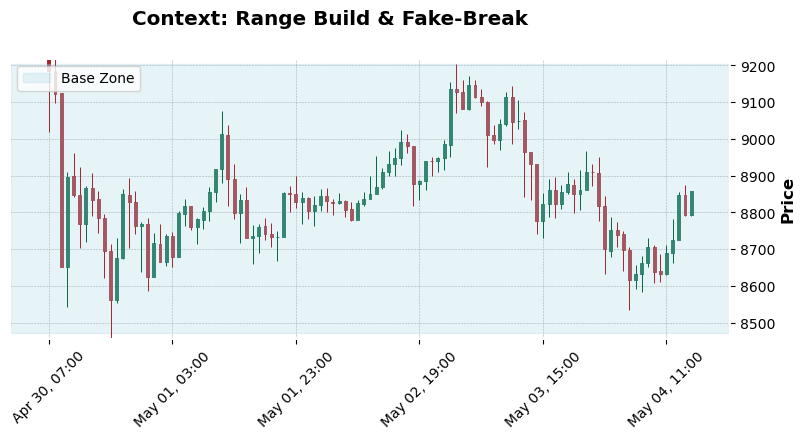

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from modules.base_zone_detector import BaseZoneDetector
from modules.bait_trap_finder    import BaitTrapFinder

# ── 1) Load & index ───────────────────────────────────────────────────────
df = pd.read_csv(
    "Resampled/Additional_Features/BTCUSD_1h_features.csv",
    parse_dates=["time"], index_col="time"
)
df.sort_index(inplace=True)

# ── 2) Detect bases & patterns ────────────────────────────────────────────
lookback_bars     = 24
tol               = 0.02
max_pullback_bars = 144
min_pivots        = 2

bases   = BaseZoneDetector(lookback_bars, tol, min_pivots).detect_bases(df)
finder  = BaitTrapFinder(lookback_bars, tol, min_pivots, tol, tol, max_pullback_bars)
patterns= finder.find_patterns(df)

# Pull out the one pattern
pat         = patterns.iloc[0]
base        = bases[pat.pattern_id]
base_start  = df.index[ base["start_idx"] ]
base_end    = df.index[ base["end_idx"] ]
fb_slice    = df.loc[ base_start : base_end + pd.Timedelta(hours=lookback_bars) ]
fb_cand     = fb_slice[ fb_slice["high"] > base["base_high"] * (1+tol) ]
fb_ts       = fb_cand.index[0] if not fb_cand.empty else None

# ── 3) CONTEXT CHART (range + fake-break only) ─────────────────────────────
pre_ctx, post_ctx = 10, 10
ctx = df.loc[
    base_start - pd.Timedelta(hours=pre_ctx) :
    base_end   + pd.Timedelta(hours=post_ctx)
]

fig, ax = mpf.plot(
    ctx[["open","high","low","close"]],
    type="candle", style="charles",
    returnfig=True, figsize=(10,4),
    title="Context: Range Build & Fake-Break",
    volume=False
)
ax = fig.axes[0]

# shade the base zone
ax.axhspan(
    base["base_low"], base["base_high"],
    color="lightblue", alpha=0.3, label="Base Zone"
)

# mark the fake-break
if fb_ts is not None:
    yfb = df.loc[fb_ts, "high"]
    ax.scatter([fb_ts],[yfb], s=100, marker="^", color="purple", label="Fake-Break")
    ax.annotate(
        "Fake-Break",
        xy=(fb_ts,yfb),
        xytext=(fb_ts, yfb + (base["base_high"]-base["base_low"])*0.3),
        arrowprops=dict(color="purple", arrowstyle="->"),
        ha="center"
    )

ax.legend(loc="upper left")
plt.show()


In [99]:
# 1) Assuming df is loaded & indexed, and finder is configured:
#    lookback_bars, tol, min_pivots, fake_break_tol, reentry_buffer, max_pullback_bars

patterns = finder.find_patterns(df)

# 2) How many patterns did we find?
total_matches = len(patterns)
print(f"Found {total_matches} bait-and-trap setups over the dataset.")

# 3) (Optional) Inspect the first few
print(patterns.head())

# 4) (Optional) See the distribution over time
#    e.g. group by month:
patterns['month'] = patterns['start_ts'].dt.to_period('M')
print(patterns.groupby('month').size())


Found 1 bait-and-trap setups over the dataset.
   pattern_id  base_low  base_high            start_ts              end_ts  \
0           0   8470.49    9203.52 2020-04-30 17:00:00 2020-05-04 05:00:00   

     trap_ts  fib_target  hit_target  bars_to_target           target_ts  
0 2020-05-10  9656.53254        True             105 2020-05-14 09:00:00  
month
2020-04    1
Freq: M, dtype: int64


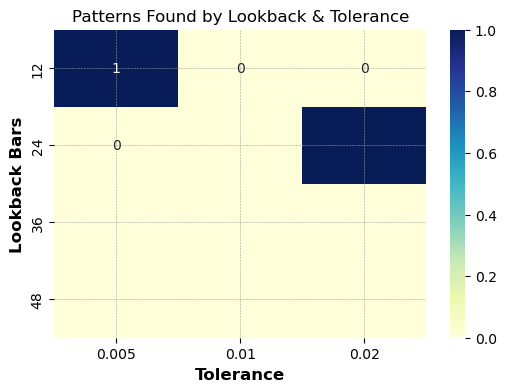

In [101]:
# After building df_grid as before:

# Create a pivot table (use keywords)
pivot = df_grid.pivot(
    index='lookback_bars',
    columns='tolerance',
    values='patterns_found'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Patterns Found by Lookback & Tolerance")
plt.xlabel("Tolerance")
plt.ylabel("Lookback Bars")
plt.show()


    lookback_bars  tolerance  patterns_found
0              12      0.005               1
1              12      0.010               0
2              12      0.020               0
3              24      0.005               0
4              24      0.010               0
5              24      0.020               1
6              36      0.005               0
7              36      0.010               0
8              36      0.020               0
9              48      0.005               0
10             48      0.010               0
11             48      0.020               0
12            168      0.005               0
13            168      0.010               0
14            168      0.020               0


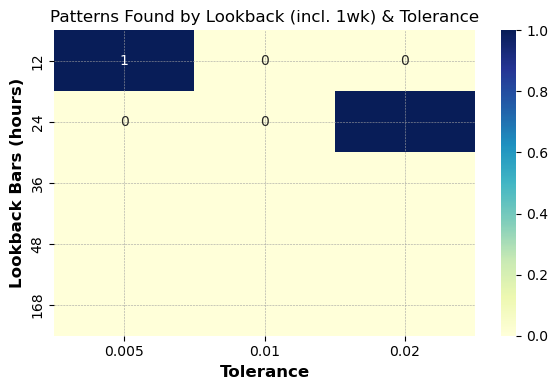

In [102]:
import os
import sys
# ensure your repo’s root is on the path so “modules” can be found
sys.path.append(os.getcwd())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from modules.base_zone_detector import BaseZoneDetector
from modules.bait_trap_finder    import BaitTrapFinder

# ── 1) Load & index ───────────────────────────────────────────────────────
df = (
    pd.read_csv(
        "Resampled/Additional_Features/BTCUSD_1h_features.csv",
        parse_dates=["time"],
        index_col="time"
    )
    .sort_index()
)

# ── 2) Define your parameter grid, including a 1-week lookback ─────────────
lookback_vals = [12, 24, 36, 48, 168]   # 168h = 1 week
tol_vals      = [0.005, 0.01, 0.02]     # 0.5%, 1%, 2%
max_pullback  = 144                     # up to 6 days of pullback
min_pivots    = 2

# ── 3) Sweep over lookbacks & tolerances ───────────────────────────────────
results = []
for lb in lookback_vals:
    for tol in tol_vals:
        finder = BaitTrapFinder(
            lookback_bars     = lb,
            equal_low_tol     = tol,
            min_pivots        = min_pivots,
            fake_break_tol    = tol,
            reentry_buffer    = tol,
            max_pullback_bars = max_pullback
        )
        pats = finder.find_patterns(df)
        results.append({
            "lookback_bars":   lb,
            "tolerance":       tol,
            "patterns_found": len(pats)
        })

df_sweep = pd.DataFrame(results)

# ── 4) Print & visualize ───────────────────────────────────────────────────
print(df_sweep)

# Pivot into a matrix for a heatmap
pivot = df_sweep.pivot(
    index='lookback_bars',
    columns='tolerance',
    values='patterns_found'
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Patterns Found by Lookback (incl. 1wk) & Tolerance")
plt.ylabel("Lookback Bars (hours)")
plt.xlabel("Tolerance")
plt.tight_layout()
plt.show()


In [103]:
import pandas as pd
from itertools import product
from modules.base_zone_detector import BaseZoneDetector
from modules.bait_trap_finder    import BaitTrapFinder

# 1) load & index
df = pd.read_csv(
    "Resampled/Additional_Features/BTCUSD_1h_features.csv",
    parse_dates=["time"], index_col="time"
).sort_index()

# 2) define your extended grid
lookbacks       = [24, 48, 168]
equal_low_tols  = [0.005, 0.01, 0.02, 0.05]
fake_break_tols = [0.01, 0.02, 0.03]
reentry_bufs    = [0.005, 0.01, 0.02]
max_pullbacks   = [144, 240, 336]
min_pivots_list = [1, 2, 3]

results = []
for lb, elt, fbt, reb, mpb, piv in product(
    lookbacks, equal_low_tols, fake_break_tols,
    reentry_bufs, max_pullbacks, min_pivots_list
):
    # require fake_break_tol >= equal_low_tol
    if fbt < elt: 
        continue

    finder = BaitTrapFinder(
        lookback_bars     = lb,
        equal_low_tol     = elt,
        min_pivots        = piv,
        fake_break_tol    = fbt,
        reentry_buffer    = reb,
        max_pullback_bars = mpb
    )
    count = len(finder.find_patterns(df))
    results.append({
        "lookback_bars":   lb,
        "equal_low_tol":   elt,
        "fake_break_tol":  fbt,
        "reentry_buffer":  reb,
        "max_pullback":    mpb,
        "min_pivots":      piv,
        "patterns_found":  count
    })

# 3) aggregate and inspect
df_grid = pd.DataFrame(results)
# show only the non-zero hits
df_hits = df_grid[df_grid.patterns_found > 0]
print("Non-zero results:")
print(df_hits.sort_values("patterns_found", ascending=False))


Non-zero results:
     lookback_bars  equal_low_tol  fake_break_tol  reentry_buffer  \
15              24          0.005            0.01           0.010   
6               24          0.005            0.01           0.005   
222             48          0.005            0.01           0.005   
12              24          0.005            0.01           0.010   
219             48          0.005            0.01           0.005   
..             ...            ...             ...             ...   
174             24          0.020            0.02           0.010   
172             24          0.020            0.02           0.010   
171             24          0.020            0.02           0.010   
169             24          0.020            0.02           0.005   
546            168          0.010            0.02           0.005   

     max_pullback  min_pivots  patterns_found  
15            336           1               3  
6             336           1               2  
222      

In [106]:
import pandas as pd
import requests
import time
from datetime import datetime, timedelta

# ETH Coinbase API URL
url = 'https://api.exchange.coinbase.com/products/ETH-USD/candles'

# 15-minute granularity
granularity = 900  # seconds

# Date range
start_time = datetime(2020, 4, 28)
end_time = datetime.now()

all_candles = []
print("Starting Coinbase ETH 15m candle download...")

while start_time < end_time:
    params = {
        'granularity': granularity,
        'start': start_time.isoformat(),
        'end': (start_time + timedelta(minutes=granularity * 300 // 60)).isoformat()
    }

    response = requests.get(url, params=params)
    data = response.json()

    if isinstance(data, dict):
        print(f"Error: {data.get('message', 'Unknown error')}")
        break

    if not data:
        print(f"No more data after {start_time}.")
        break

    all_candles.extend(data)

    start_time += timedelta(minutes=granularity * 300 // 60)
    time.sleep(0.5)

    print(f"Fetched up to {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n✅ Total 15m ETH candles downloaded: {len(all_candles)}")

# Convert to DataFrame
df_15m = pd.DataFrame(all_candles, columns=['time', 'low', 'high', 'open', 'close', 'volume'])
df_15m['time'] = pd.to_datetime(df_15m['time'], unit='s')
df_15m.set_index('time', inplace=True)
df_15m.sort_index(inplace=True)

# Resample to 30m
df_30m = pd.DataFrame()
df_30m['open'] = df_15m['open'].resample('30T').first()
df_30m['high'] = df_15m['high'].resample('30T').max()
df_30m['low'] = df_15m['low'].resample('30T').min()
df_30m['close'] = df_15m['close'].resample('30T').last()
df_30m['volume'] = df_15m['volume'].resample('30T').sum()
df_30m.dropna(inplace=True)

# Save to CSV
df_30m.to_csv('./Resampled/raw/ETHUSD_30m.csv')
print("✅ Saved ETHUSD 30m candles to ./Resampled/raw/ETHUSD_30m.csv")


Starting Coinbase ETH 15m candle download...
Fetched up to 2020-05-01 03:00:00
Fetched up to 2020-05-04 06:00:00
Fetched up to 2020-05-07 09:00:00
Fetched up to 2020-05-10 12:00:00
Fetched up to 2020-05-13 15:00:00
Fetched up to 2020-05-16 18:00:00
Fetched up to 2020-05-19 21:00:00
Fetched up to 2020-05-23 00:00:00
Fetched up to 2020-05-26 03:00:00
Fetched up to 2020-05-29 06:00:00
Fetched up to 2020-06-01 09:00:00
Fetched up to 2020-06-04 12:00:00
Fetched up to 2020-06-07 15:00:00
Fetched up to 2020-06-10 18:00:00
Fetched up to 2020-06-13 21:00:00
Fetched up to 2020-06-17 00:00:00
Fetched up to 2020-06-20 03:00:00
Fetched up to 2020-06-23 06:00:00
Fetched up to 2020-06-26 09:00:00
Fetched up to 2020-06-29 12:00:00
Fetched up to 2020-07-02 15:00:00
Fetched up to 2020-07-05 18:00:00
Fetched up to 2020-07-08 21:00:00
Fetched up to 2020-07-12 00:00:00
Fetched up to 2020-07-15 03:00:00
Fetched up to 2020-07-18 06:00:00
Fetched up to 2020-07-21 09:00:00
Fetched up to 2020-07-24 12:00:00
Fet

In [121]:
import pandas as pd

# 1) Import the exact same pipeline functions you used on BTC
from modules.timestamp_features         import add_timestamp_features
from modules.volatility_features        import add_volatility_features
from modules.session_labeler            import add_session_labels
from modules.combined_features          import (
    add_session_structure_features,
    add_candle_structure_features,
    add_trend_continuation_features,
    add_structure_zone_features,
    add_meta_composite_features
)
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector      import flag_bait_and_trap

# === ETH 30 m Features ===
df_30m = pd.read_csv(
   "./Resampled/Raw/ETHUSD_30m.csv",
    parse_dates=['time'], index_col='time'
)
# Build up features
df_30m = add_timestamp_features(df_30m)
df_30m = add_volatility_features(df_30m)
df_30m = add_session_labels(df_30m)
df_30m = add_session_structure_features(df_30m)
df_30m = add_candle_structure_features(df_30m)
df_30m = add_trend_continuation_features(df_30m)
df_30m = add_structure_zone_features(df_30m)
df_30m = add_meta_composite_features(df_30m)
# Save
df_30m.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
print("✅ ETH 30m features updated.")

# === ETH 1 h Features ===
df_1h = pd.read_csv(
    "./Resampled/Raw/ETHUSD_30m.csv",
    parse_dates=['time'], index_col='time'
)
df_1h = add_timestamp_features(df_1h)
df_1h = add_volatility_features(df_1h)
df_1h = add_session_labels(df_1h)
df_1h = add_session_structure_features(df_1h)
df_1h = add_candle_structure_features(df_1h)
df_1h = add_trend_continuation_features(df_1h)
df_1h = add_structure_zone_features(df_1h)
df_1h = add_meta_composite_features(df_1h)
df_1h.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
print("✅ ETH 1h features updated.")

# === ETH 1 d Features ===
df_1d = pd.read_csv(
    "./Resampled/Raw/ETHUSD_30m.csv",
    parse_dates=['time'], index_col='time'
)
# Skip timestamp_features on daily
df_1d = add_volatility_features(df_1d)
df_1d = add_session_labels(df_1d)
df_1d = add_session_structure_features(df_1d)
df_1d = add_candle_structure_features(df_1d)
df_1d = add_trend_continuation_features(df_1d)
df_1d = add_structure_zone_features(df_1d)
df_1d = add_meta_composite_features(df_1d)
df_1d.to_csv("./Resampled/Raw/ETHUSD_30m.csv")
print("✅ ETH 1d features updated.")

# === ETH 30 m: Add SR zones and trap flags ===
df_full = pd.read_csv(
   "./Resampled/Raw/ETHUSD_30m.csv",
    parse_dates=['time']
).set_index('time')
# Support/Resistance
df_full = add_support_resistance_features(
    df_full,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df_full = assign_active_range(df_full)
# Bait‐and‐Trap
df_full = flag_bait_and_trap(df_full, lookahead=15)
# Save final
df_full.to_csv("./Resampled/Raw/ETHUSD_30m.csv", index=False)
print("✅ ETH full 30m SR & trap patterns saved.")


✅ ETH 30m features updated.
✅ ETH 1h features updated.
✅ ETH 1d features updated.
✅ ETH full 30m SR & trap patterns saved.


In [130]:
import sys
# Ensure Python can import your local modules
sys.path.insert(0, './modules')

import pandas as pd

# 1) Load your ETH 30 m feature CSV (with separate date/time columns)
df = pd.read_csv(
    "./Resampled/Additional_Features/ETHUSD_30m.csv"
)

# 2) Reconstruct a DateTimeIndex from the 'date' and 'time_of_day' columns
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df = df.set_index('time').sort_index()

# 3) Import support/resistance and trap‐detector functions
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector import flag_bait_and_trap

# 4) Build support/resistance zones
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 5) Flag bait-and-trap patterns (using a 15-bar lookahead)
df = flag_bait_and_trap(df, lookahead=15)

# 6) Extract and inspect the matches
matches = df[df['bait_trap_pattern'] == True]
print(f"Found {len(matches)} bait-and-trap setups on ETH 30 m")
print(matches.head())

# 7) (Optional) Save the matches for later review
matches.to_csv("AnalysisResults/ETHUSD_30m_bait_and_trap_matches.csv", index=False)


Found 3535 bait-and-trap setups on ETH 30 m
                       open    high     low   close       volume        date  \
time                                                                           
2020-06-15 03:00:00  228.99  229.00  225.91  226.05  5015.297904  2020-06-15   
2020-06-15 03:30:00  226.05  227.25  224.36  225.30  7777.122453  2020-06-15   
2020-06-15 04:30:00  226.71  227.03  225.95  226.36  2640.298120  2020-06-15   
2020-06-15 05:00:00  226.37  226.46  224.11  225.20  3880.794599  2020-06-15   
2020-06-29 01:30:00  225.31  226.50  225.15  226.42  1942.348699  2020-06-29   

                    time_of_day  hour  minute  weekday  ...  dist_to_support  \
time                                                    ...                    
2020-06-15 03:00:00    03:00:00     3       0        0  ...         0.017359   
2020-06-15 03:30:00    03:30:00     3      30        0  ...         0.010379   
2020-06-15 04:30:00    04:30:00     4      30        0  ...         0.01753

In [129]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'session', 'date',
       'time_of_day', 'hour', 'minute', 'weekday', 'month', 'range',
       'price_return', 'abs_return', 'ATR_14', 'efficiency', 'range_change',
       'efficiency_change', 'volatility_spike', 'rolling_volatility_std',
       'session_step', 'time_since_session_open', 'price_vs_session_open',
       'prev_session', 'is_session_transition', 'prev_session_return',
       'prev_session_efficiency', 'body_ratio', 'wick_top', 'wick_bottom',
       'prev_high', 'prev_low', 'fakeout_flag', 'engulfing_flag',
       'strong_close', 'prev_return', 'return_direction_match',
       'rolling_return_sum_3', 'rolling_max_high', 'rolling_min_low',
       'relative_to_local_extreme', 'distance_to_prev_high',
       'distance_to_prev_low', 'touch_prev_session_high',
       'touch_prev_session_low', 'is_range_boundary_test',
       'equal_highs_lows_flag', 'return', 'trend_strength',
       'volatility_normalized_return', 'body_wick_ali

In [178]:
import pandas as pd
import sys

# 1) Ensure we can import your local modules folder
sys.path.insert(0, './modules')

# 2) Load the ETH 30 m FEATURES CSV (with separate date & time columns)
df = pd.read_csv(
    "./Resampled/Additional_Features/ETHUSD_30m.csv"
)

# 3) Reconstruct a single DateTimeIndex from 'date' + 'time_of_day'
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df = df.set_index('time').sort_index()

# 4) (Optional) drop the now-redundant columns
df = df.drop(columns=['date', 'time_of_day'])

# 5) Import your support/resistance and trap-detector functions
from modules.support_resistance_features import (
    add_support_resistance_features,
    assign_active_range
)
from modules.trap_pattern_detector import flag_bait_and_trap

# 6) Build SR zones (needed by the trap logic)
df = add_support_resistance_features(
    df,
    pivot_order=5,
    zone_eps=0.002,
    min_zone_points=2,
    buffer=0.001
)
df = assign_active_range(df)

# 7) Flag bait-and-trap patterns (15-bar lookahead on 30 m bars)
df = flag_bait_and_trap(df, lookahead=15)

# 8) Extract and inspect your matches
matches = df[df["bait_trap_pattern"] == True]
print(f"Found {len(matches)} bait-and-trap setups on ETH 30 m\n")
print(matches[[
    "open", "high", "low", "close",
    "range_bot", "range_top",
    "fake_break_high", "fake_break_low",
    "time_to_support"
]].tail())

# 9) (Optional) save for later review
matches.to_csv("AnalysisResults/ETHUSD_30m_bait_and_trap_matches.csv", index=False)


Found 3535 bait-and-trap setups on ETH 30 m

                        open     high      low    close    range_bot  \
time                                                                   
2025-04-30 06:30:00  1808.18  1809.04  1803.15  1803.70  1756.208634   
2025-04-30 09:30:00  1801.29  1808.79  1801.29  1806.81  1756.208634   
2025-04-30 10:00:00  1806.98  1809.77  1804.10  1807.05  1756.208634   
2025-04-30 10:30:00  1806.98  1811.24  1804.13  1808.08  1756.208634   
2025-04-30 12:00:00  1816.09  1817.12  1795.04  1797.32  1756.208634   

                       range_top  fake_break_high  fake_break_low  \
time                                                                
2025-04-30 06:30:00  1808.436667             True            True   
2025-04-30 09:30:00  1808.436667             True            True   
2025-04-30 10:00:00  1808.436667             True            True   
2025-04-30 10:30:00  1808.436667             True            True   
2025-04-30 12:00:00  1808.436667    

In [180]:
print(matches[[
    "open", "high", "low", "close",
    "range_bot", "range_top",
    "fake_break_high", "fake_break_low",
    "time_to_support"
]].tail(10))


                        open     high      low    close    range_bot  \
time                                                                   
2025-04-28 08:00:00  1805.65  1809.49  1802.45  1808.23  1756.208634   
2025-04-28 09:30:00  1811.73  1814.12  1805.34  1806.83  1756.208634   
2025-04-28 10:00:00  1806.55  1809.72  1789.76  1796.64  1756.208634   
2025-04-28 12:30:00  1813.40  1815.97  1805.77  1808.00  1756.208634   
2025-04-28 13:00:00  1807.73  1811.68  1799.25  1799.63  1756.208634   
2025-04-30 06:30:00  1808.18  1809.04  1803.15  1803.70  1756.208634   
2025-04-30 09:30:00  1801.29  1808.79  1801.29  1806.81  1756.208634   
2025-04-30 10:00:00  1806.98  1809.77  1804.10  1807.05  1756.208634   
2025-04-30 10:30:00  1806.98  1811.24  1804.13  1808.08  1756.208634   
2025-04-30 12:00:00  1816.09  1817.12  1795.04  1797.32  1756.208634   

                       range_top  fake_break_high  fake_break_low  \
time                                                              

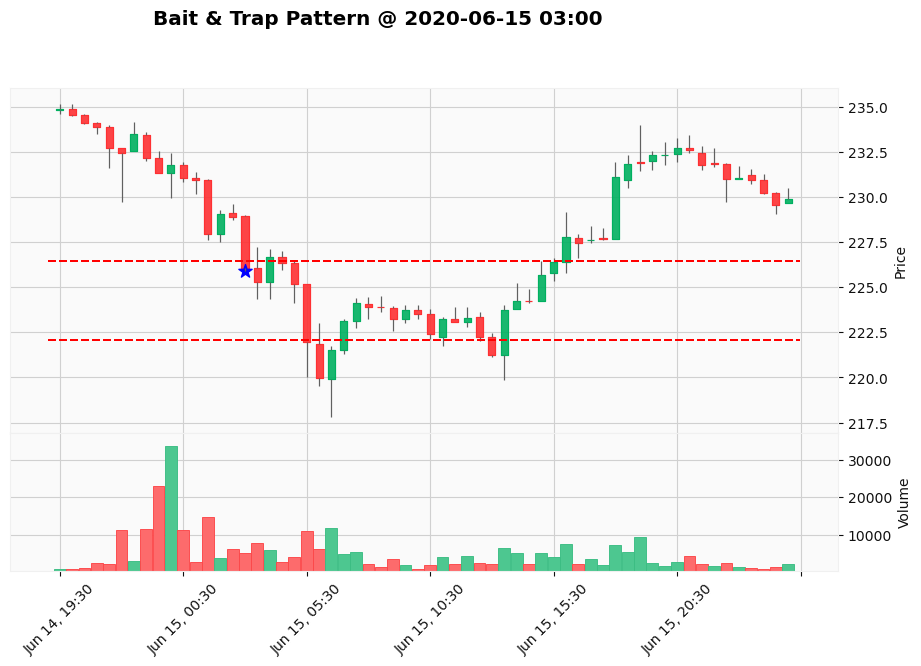

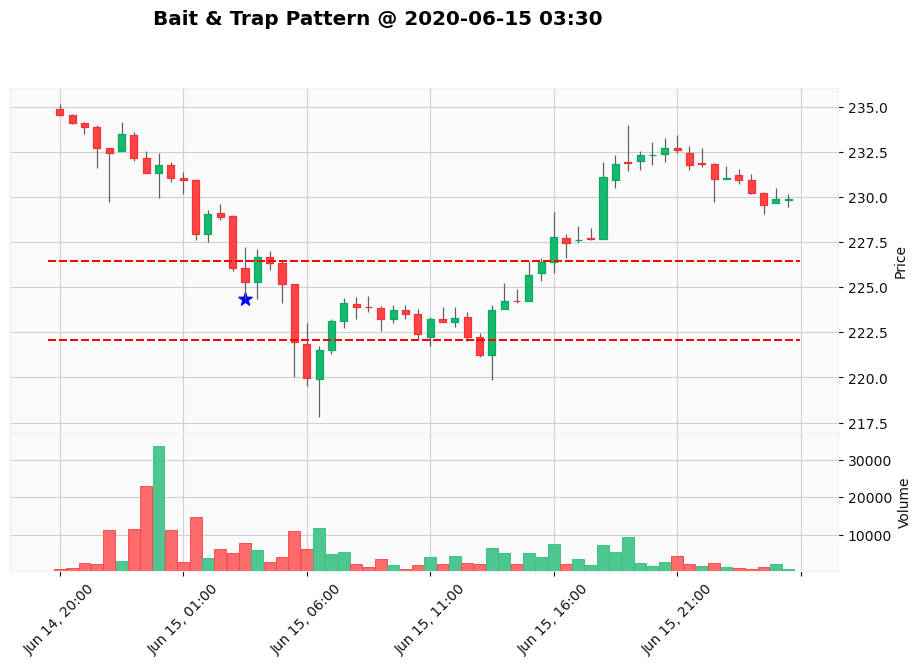

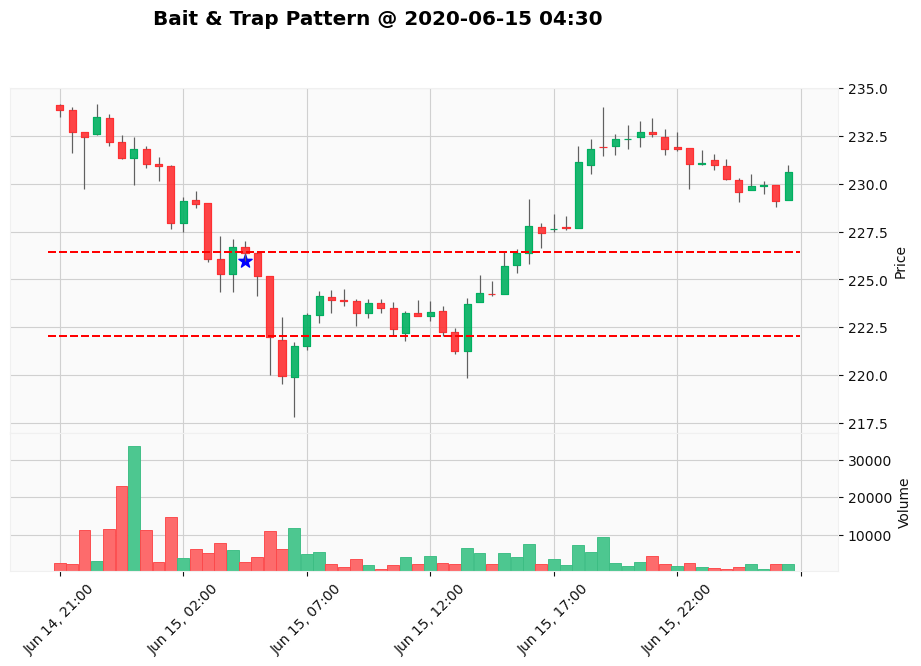

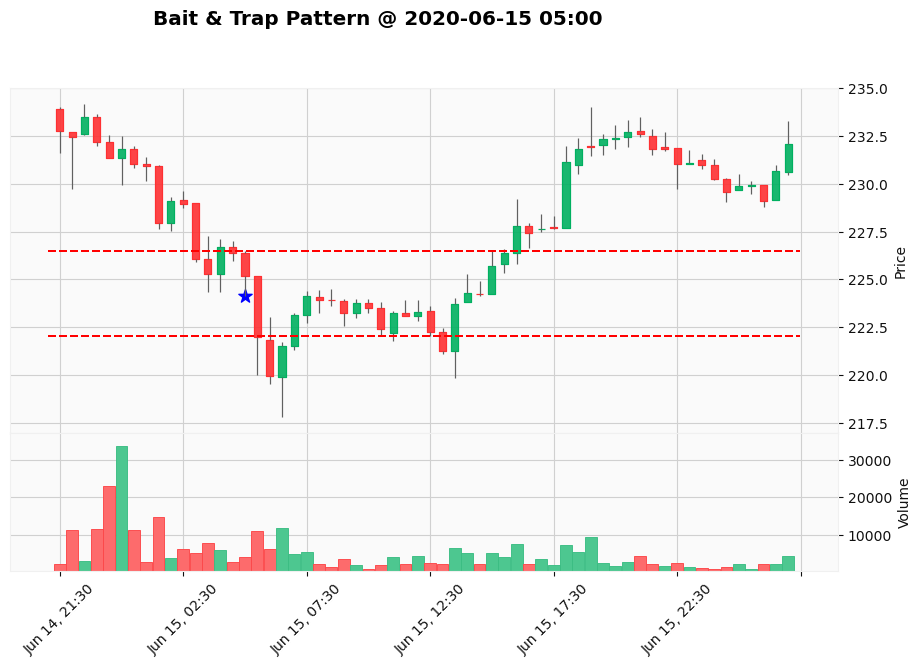

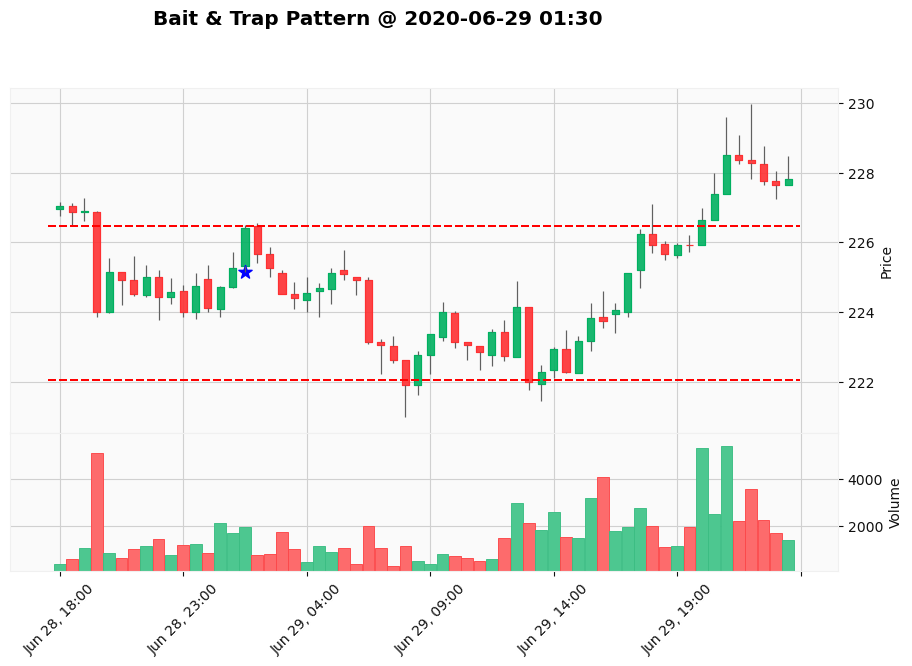

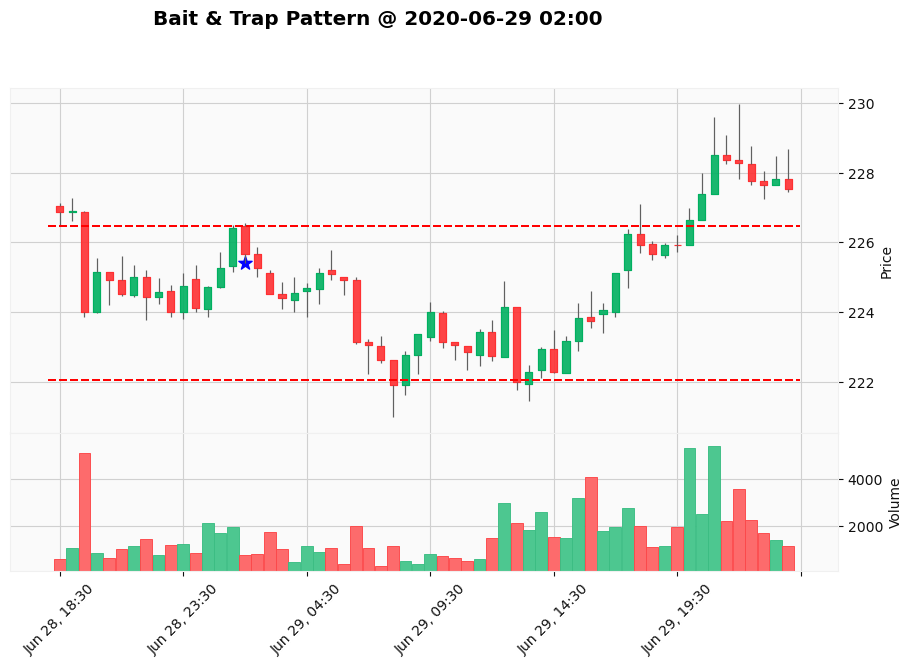

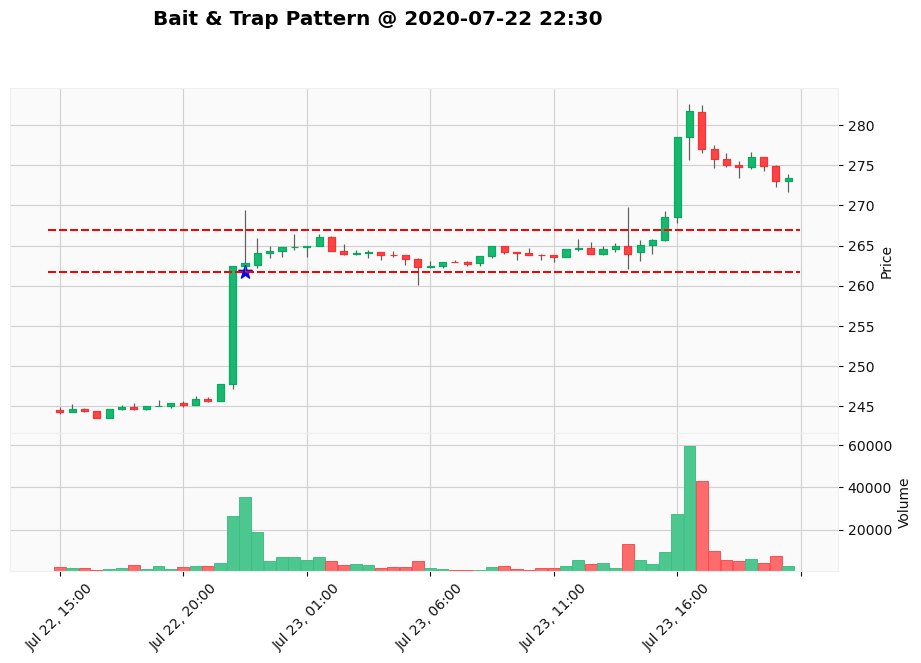

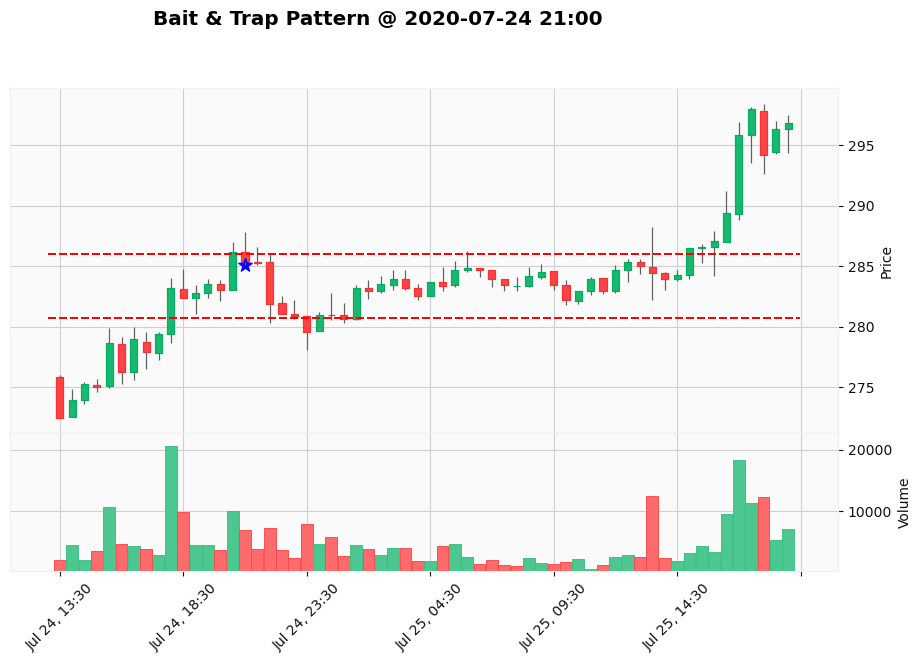

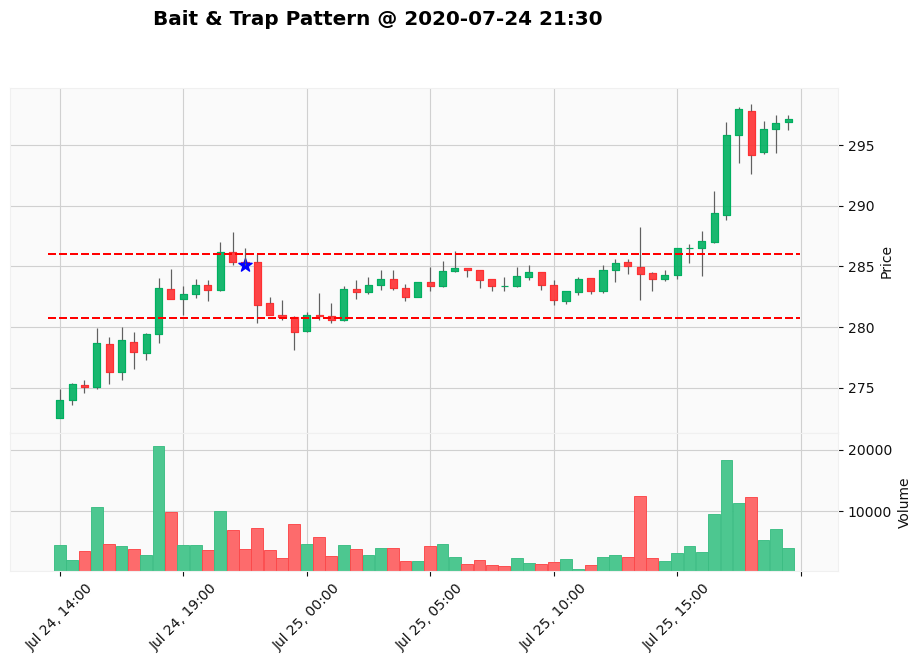

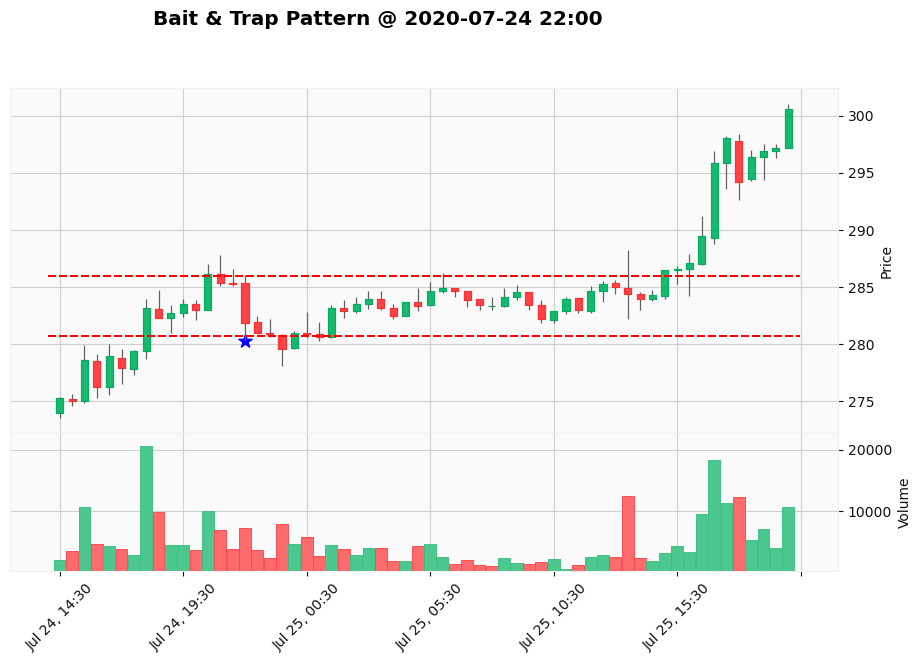

In [159]:
from modules.visualize_bait_traps import visualize_bait_traps

visualize_bait_traps(df, matches, num_charts=10, pre_bars=15, post_bars=45)



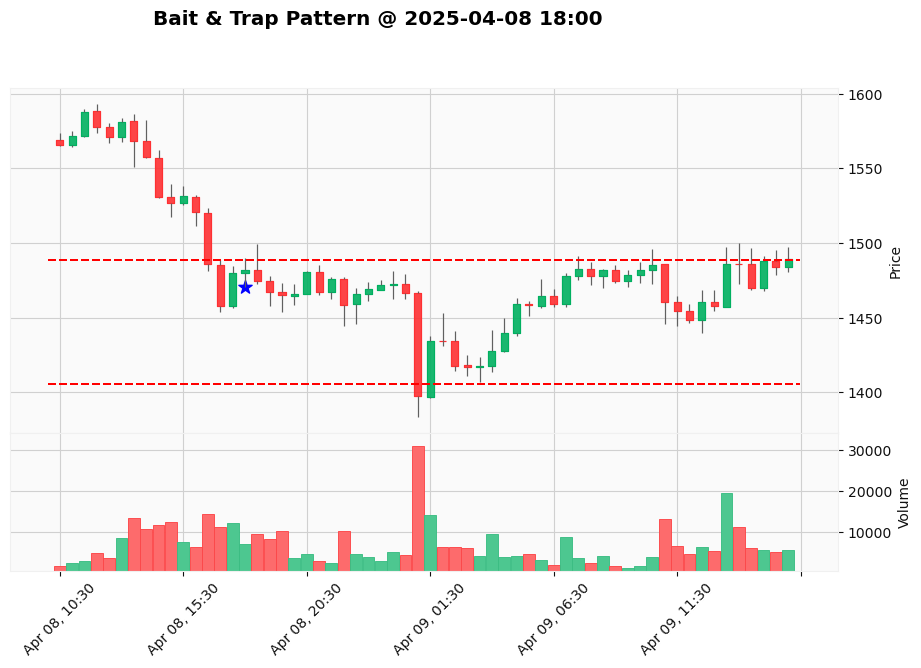

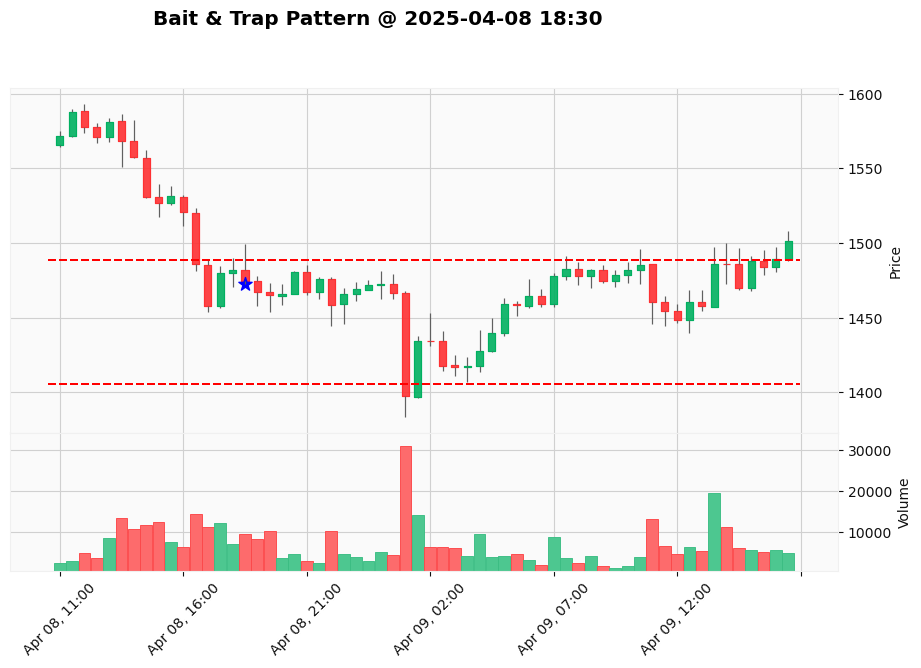

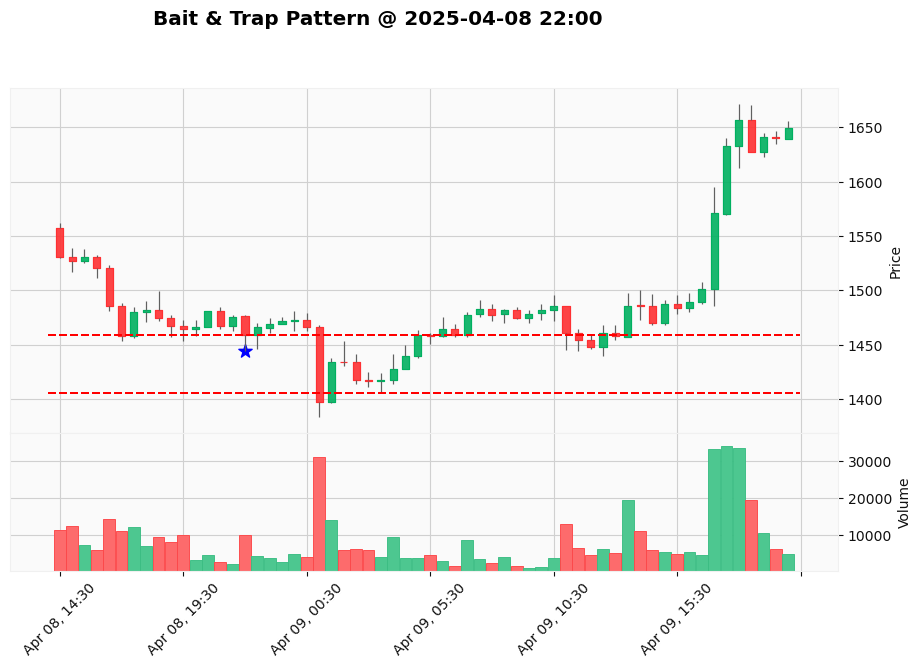

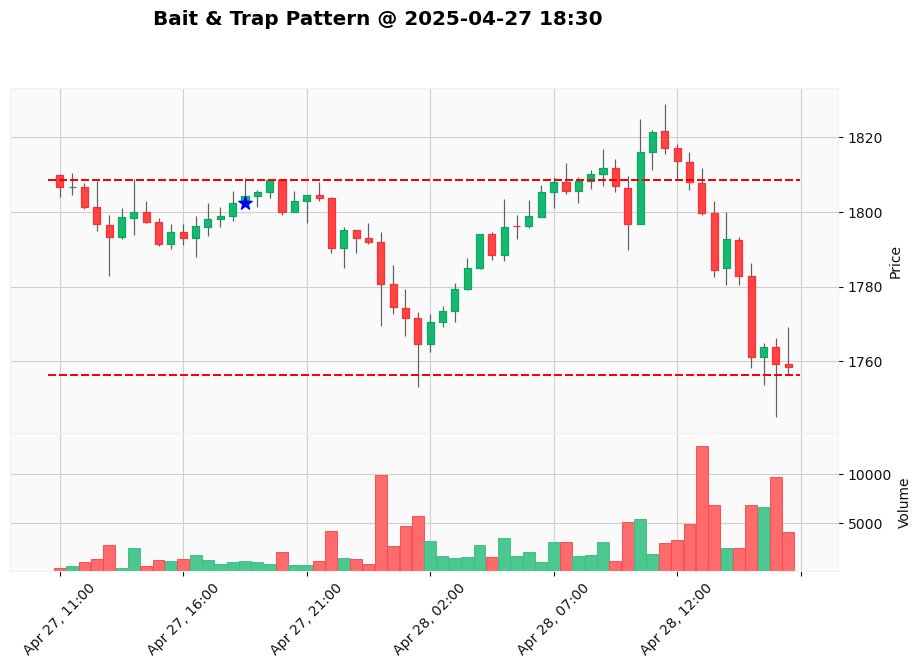

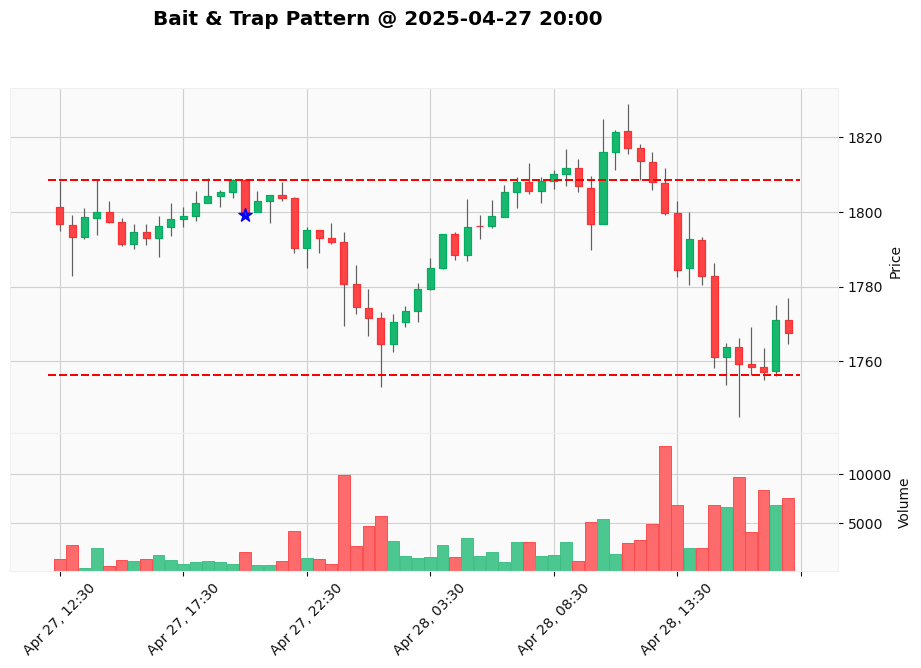

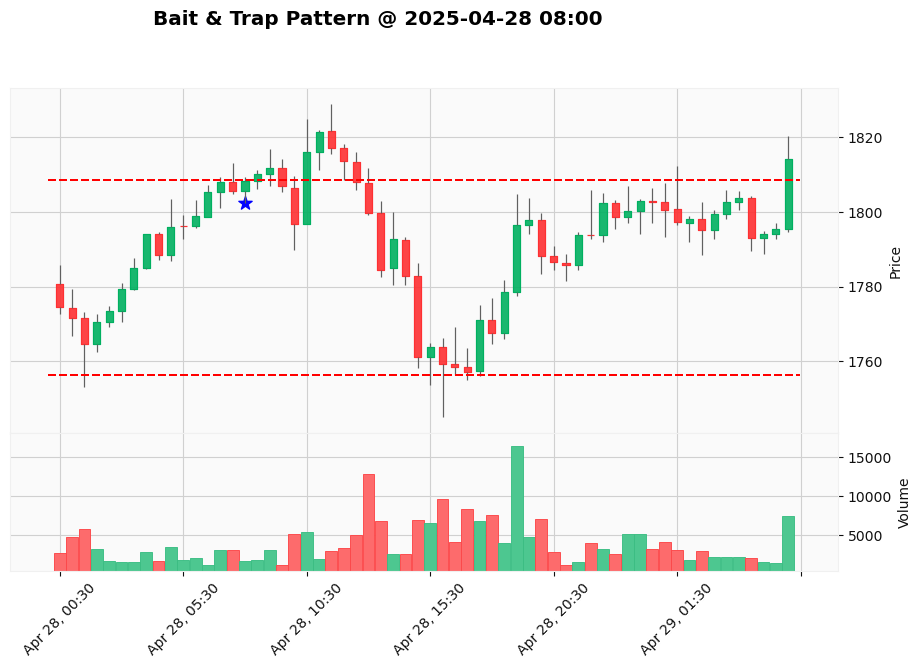

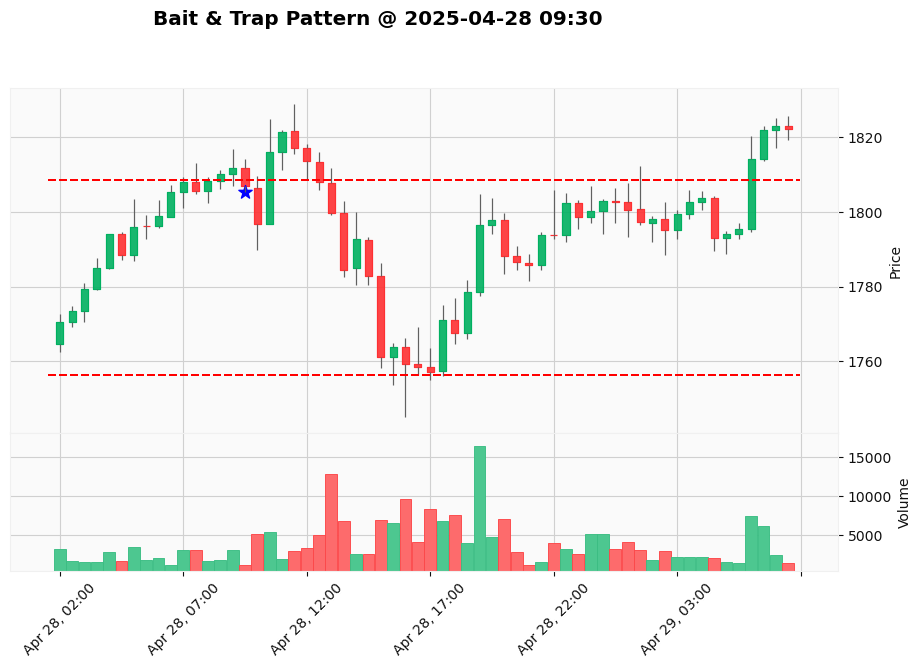

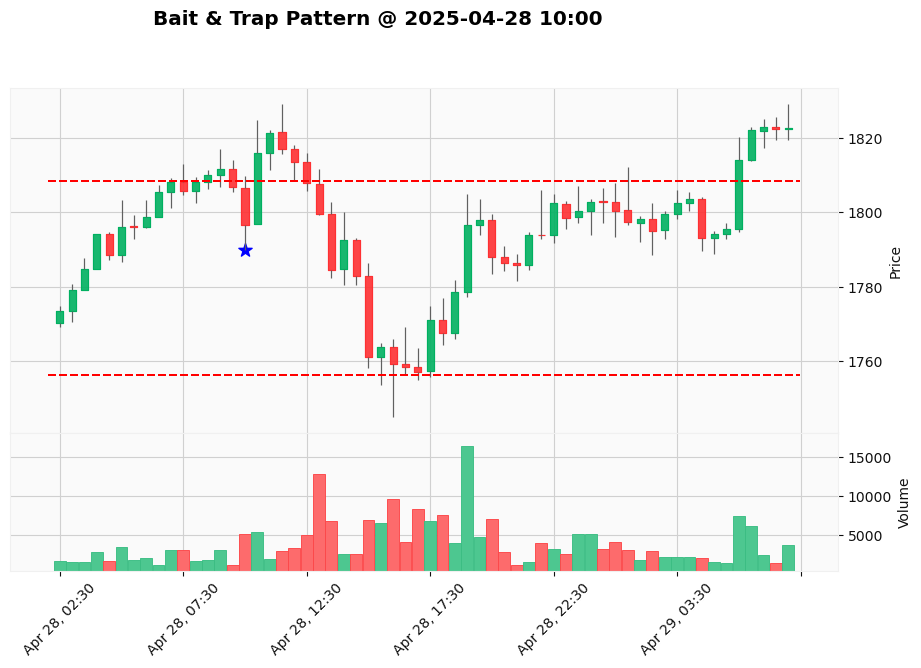

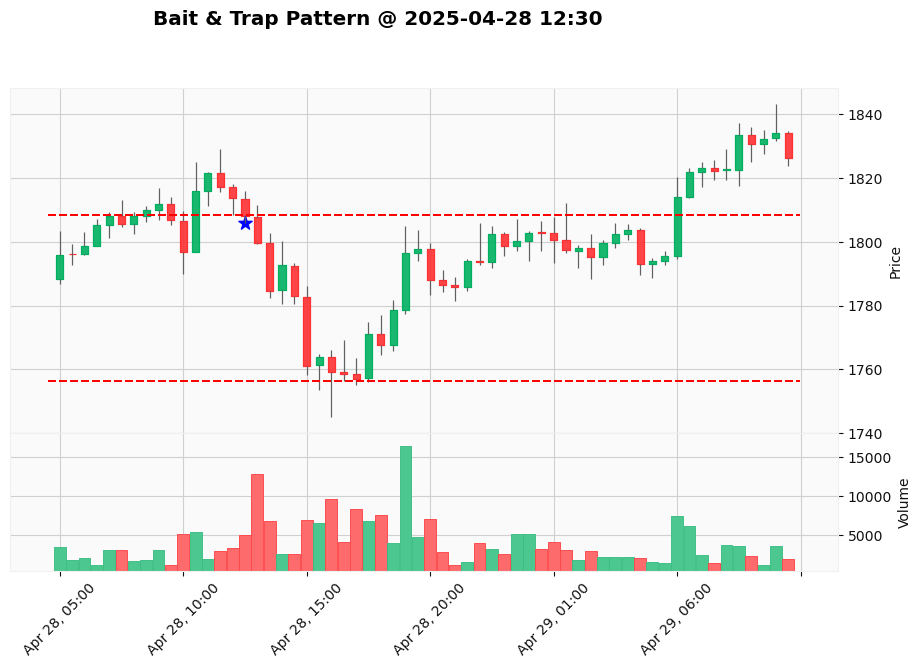

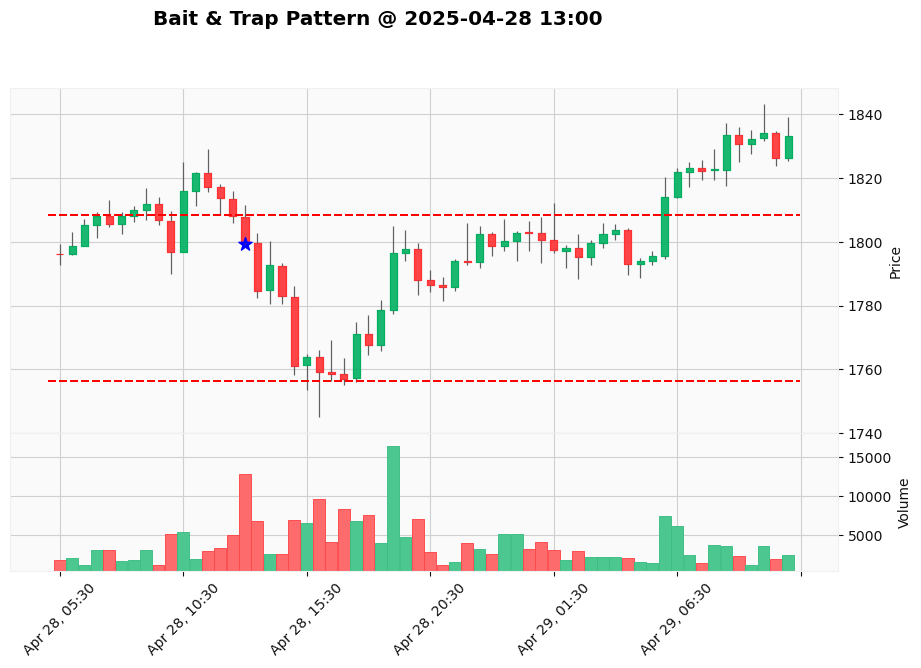

In [190]:
from modules.visualize_bait_traps import visualize_bait_traps

visualize_bait_traps(df, matches.tail(15), num_charts=10, pre_bars=15, post_bars=45)


In [191]:
# 8.1) Filter matches to a specific date window
start = pd.Timestamp("2025-04-21")
end = pd.Timestamp("2025-05-02")

matches_in_range = matches[(matches.index >= start) & (matches.index <= end)]

print(f"✅ Trap patterns detected between {start.date()} and {end.date()}: {len(matches_in_range)}")
print(matches_in_range[[
    "open", "high", "low", "close",
    "range_bot", "range_top",
    "fake_break_high", "fake_break_low",
    "time_to_support"
]])


In [193]:
from trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations

config = TrapPatternConfig()

# Step 1: Detect impulses
impulses = detect_impulses(df, config)
print(f"✅ Detected {len(impulses)} impulses")
for i, impulse in enumerate(impulses[:3]):
    print(f"[Impulse {i}] {impulse}")

# Step 2: Detect consolidations based on those impulses
ranges = detect_consolidations(df, impulses, config)
print(f"✅ Detected {len(ranges)} consolidation ranges")
for i, r in enumerate(ranges[:3]):
    print(f"[Range {i}] {r}")


✅ Detected 9789 impulses
[Impulse 0] {'start_idx': Timestamp('2020-04-28 19:30:00'), 'end_idx': Timestamp('2020-04-30 05:30:00'), 'start_price': 195.85, 'end_price': 226.35, 'gain_pct': 15.573142711258617}
[Impulse 1] {'start_idx': Timestamp('2020-04-28 20:00:00'), 'end_idx': Timestamp('2020-04-30 05:30:00'), 'start_price': 196.09, 'end_price': 226.35, 'gain_pct': 15.431689530317708}
[Impulse 2] {'start_idx': Timestamp('2020-04-28 20:30:00'), 'end_idx': Timestamp('2020-04-30 05:30:00'), 'start_price': 196.51, 'end_price': 226.35, 'gain_pct': 15.184977863721953}
✅ Detected 2988 consolidation ranges
[Range 0] {'range_start': Timestamp('2020-05-05 05:00:00'), 'range_end': Timestamp('2020-05-06 10:30:00'), 'range_high': 212.17, 'range_low': 201.33, 'impulse_end': Timestamp('2020-05-05 04:30:00')}
[Range 1] {'range_start': Timestamp('2020-05-08 01:00:00'), 'range_end': Timestamp('2020-05-09 06:30:00'), 'range_high': 217.0, 'range_low': 207.2, 'impulse_end': Timestamp('2020-05-08 00:30:00')}

In [195]:
range_starts = [r['range_start'] for r in ranges]
range_ends = [r['range_end'] for r in ranges]

overall_start = min(range_starts)
overall_end = max(range_ends)

print(f"🗓️ Trap pattern coverage window: {overall_start} → {overall_end}")
print(f"Total duration: {(overall_end - overall_start).days} days")


🗓️ Trap pattern coverage window: 2020-05-05 05:00:00 → 2025-05-02 21:00:00
Total duration: 1823 days


In [197]:
from datetime import timedelta

durations = []

for imp in impulses:
    start = imp['start_idx']
    end = imp['end_idx']
    duration_bars = (df.index.get_loc(end) - df.index.get_loc(start))
    durations.append(duration_bars)

avg_bars = np.mean(durations)
avg_hours = avg_bars * 0.5  # since each bar is 30 minutes

print(f"📊 Average impulse duration: {avg_bars:.2f} bars (~{avg_hours:.2f} hours)")
print(f"📈 Min duration: {min(durations)} bars, Max: {max(durations)} bars")


📊 Average impulse duration: 54.90 bars (~27.45 hours)
📈 Min duration: 2 bars, Max: 69 bars


In [333]:
from trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations, visualize_trap_context

config = TrapPatternConfig()
impulses = detect_impulses(df, config)
ranges = detect_consolidations(df, impulses, config)


In [233]:
# Reuse previously cached results
visualize_trap_context(df, ranges, "2025-04-21", "2025-05-02")


TypeError: kwarg "hlines" validator returned False for value: "[{'hlines': [1758.53, 1835.74], 'colors': 'red', 'linestyle': 'dashed'}, {'hlines': [1593.79], 'colors': 'blue', 'linestyle': 'solid'}]"
    'Validator'   : lambda value: _hlines_validator(value) },

In [231]:
from modules.trap_pattern_detector import TrapPatternConfig, detect_impulses, detect_consolidations, visualize_trap_context
import pickle
# 1. Slice your original DataFrame to only this window
start_date = "2025-04-21"
end_date = "2025-05-02"
df_slice = df.loc[start_date:end_date].copy()

# 2. Initialize your config
config = TrapPatternConfig(
    impulse_min_gain_pct=7.0,      # use whatever you previously set
    impulse_max_duration_bars=70,  # previously tested params
)

# 3. Run detection on this slice only
impulses = detect_impulses(df_slice, config)
ranges = detect_consolidations(df_slice, impulses, config)

# Save for reuse
with open("cache.pkl", "wb") as f:
    pickle.dump((impulses, ranges), f)

# Later, just reload
with open("cache.pkl", "rb") as f:
    impulses, ranges = pickle.load(f)
# 4. Visualize results for just this slice



In [240]:
plot_df = df_slice.resample('1H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})


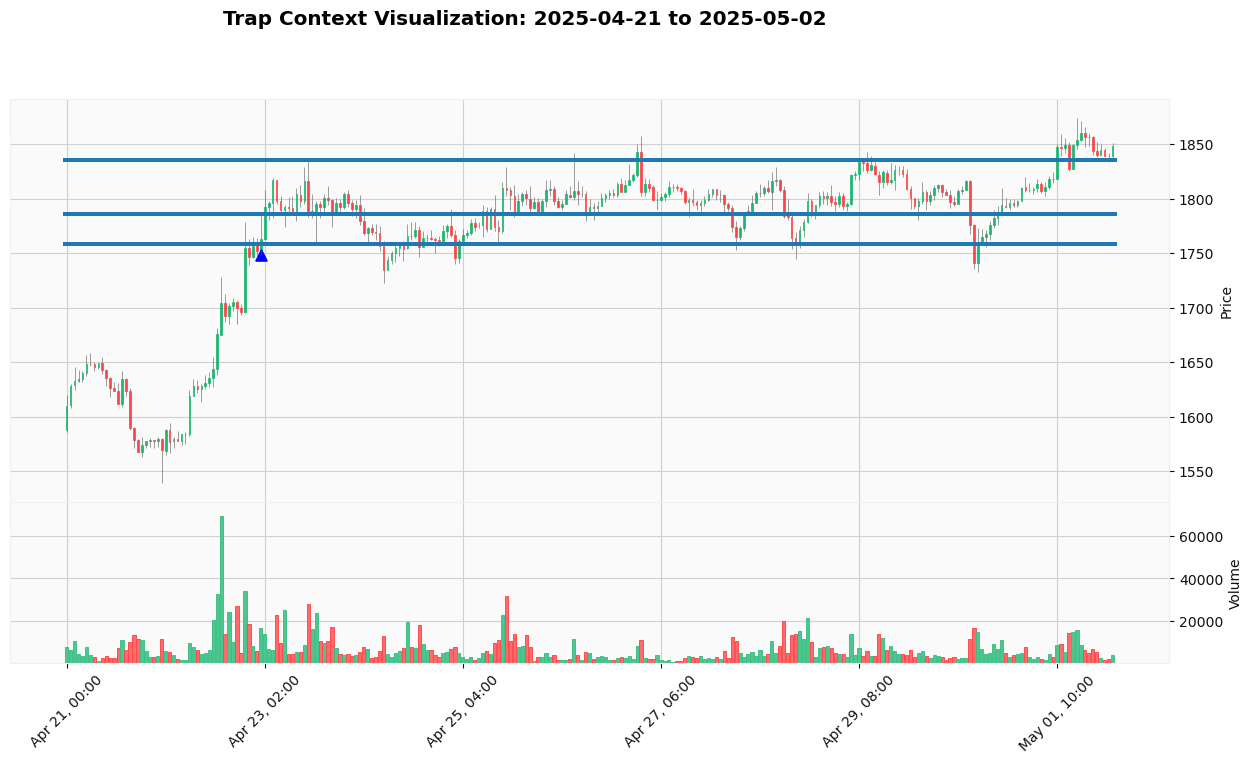

In [241]:
visualize_trap_context(plot_df, ranges, start_date, end_date)


In [ ]:
import pandas as pd
import pickle
from modules.trap_pattern_detector import (
    TrapPatternConfig,
    detect_impulses,
    detect_consolidations,
    visualize_trap_context
)

# If not already done
df = pd.read_csv("./Resampled/Additional_Features/ETHUSD_30m.csv")
df['time'] = pd.to_datetime(df['date'] + ' ' + df['time_of_day'])
df = df.set_index('time').sort_index()
df = df.drop(columns=['date', 'time_of_day'])

# Slice to your window
start_date = "2025-04-21"
end_date = "2025-05-02"
df_slice = df.loc[start_date:end_date].copy()
